<a href="https://colab.research.google.com/github/eisbetterthanpi/JEPA/blob/main/Seq_JEPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## opportunity

In [ ]:
# @title download opportunity
!wget https://archive.ics.uci.edu/static/public/226/opportunity+activity+recognition.zip -O opportunity.zip
!unzip opportunity.zip

In [ ]:
# path = '/content/OpportunityUCIDataset/dataset/'
path = '/content/OpportunityUCIDataset/dataset/S1-ADL1.dat'
path = '/content/OpportunityUCIDataset/dataset/S1-Drill.dat'
# df = pd.read_table(path+file, header=None, sep='\s+')
df = pd.read_table(path, header=None, sep='\s+')
print(df)

# 51116 rows x 250
# 54966 rows x 250


           0     1       2      3      4      5      6      7       8     9    \
0            0  40.0  1031.0   49.0 -255.0  958.0  250.0 -232.0   969.0  44.0   
1           33  49.0  1043.0   42.0 -244.0  954.0  257.0 -242.0   979.0  31.0   
2           67  17.0  1049.0   84.0 -243.0  958.0  278.0 -256.0   984.0   2.0   
3          100  23.0  1051.0   98.0 -234.0  969.0  295.0 -263.0   972.0 -10.0   
4          133  -3.0  1045.0  102.0 -213.0  975.0  273.0 -255.0  1029.0 -44.0   
...        ...   ...     ...    ...    ...    ...    ...    ...     ...   ...   
54961  1832015   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   NaN   
54962  1832048   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   NaN   
54963  1832082   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   NaN   
54964  1832115   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   NaN   
54965  1832148   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   NaN   

       ...   240   241   24

In [ ]:
# @title opportunity me
import os
import numpy as np
import pandas as pd
# https://github.com/IliesChibane/Exploring-the-OPPORTUNITY-Dataset-for-Activity-Recognition/blob/main/preprocess.ipynb

# columns = []
# with open('/content/OpportunityUCIDataset/dataset/column_names.txt') as f:
#     for line in f.read().splitlines():
#         print(line)
#         # if 'Column' in line: columns.append(line[get_index(line):].split(";")[0])

# dataset = pd.DataFrame(columns=columns)
# path = '/content/OpportunityUCIDataset/dataset/'
# for file in os.listdir(path):
#     print(file)
#     if not file.endswith('.dat'): continue
# # for file, subject_id in zip(file_names, subject_id):
#     df = pd.read_table(path+file, header=None, sep='\s+')
#     # df.columns = all_columns
#     df['subject'] = file[:2]
#     dataset = pd.concat([dataset, df], ignore_index=True)


# 1: ms, 2-243: data, 244-250: labels


# ans = [y for _, y in dataset.groupby(list(dataset)[244-1:250])] # cols 244-250
ans = [y for _, y in dataset.groupby(list(dataset)[244-1])] # cols 244-250
y=list(set([df['subject'].iloc[0] for df in ans]))
y.sort()

# dataset_size = len(train_data)
# indices = list(range(dataset_size))
# split = int(np.floor(0.7 * dataset_size))
# np.random.seed(0)
# np.random.shuffle(indices)
# train_indices, val_indices = indices[:split], indices[split:]

df_train = dataset[dataset['subject'].isin(y[:int(.7*len(y))])]
df_test = dataset[dataset['subject'].isin(y[-int(.3*len(y)):])]

def make_Xy(dataset):
    # ans = [y for _, y in dataset.groupby(['subject', 'activity'])]
    # ans = [y for _, y in dataset.groupby(list(dataset)[244-1:250])] # cols 244-250
    ans = [y for _, y in dataset.groupby(list(dataset)[244-1])] # cols 244-250
    y_train = [df[list(dataset)[244]].iloc[0] for df in ans]
    # y_train = [df['subject'].iloc[0] for df in ans]
    # X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in X_train]
    X_train = [df.drop(list(dataset)[244-1:250], axis=1) for df in ans]
    X_train = [df.apply(pd.to_numeric, errors='coerce') for df in X_train] # Convert non-numeric data in dataset to numeric. errors='coerce': replace all non-numeric values with NaN.
    X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in X_train] # replace NaN by interpolating
    # X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in ans]
    return X_train, y_train

X_train, y_train = make_Xy(df_train)
X_test, y_test = make_Xy(df_test)


# data_dir = 'OpportunityUCIDataset/dataset'
# files = os.listdir(data_dir)
# files = [f for f in files if f.endswith('.dat')]
# # Separate the ADL and Drill files
# # ADL (Activities of Daily Living): naturalistic, semi-structured routines like making coffee, opening doors, etc.
# # Drill: Controlled executions of specific gestures (e.g. open door with right arm) — highly structured, for training gesture classifiers.
# dataset = pd.DataFrame(columns=columns)
# list_of_files = [f for f in files if 'Drill' not in f]
# for _, file in enumerate(list_of_files):
#     proc_data = pd.read_table(os.path.join(data_dir, file), header=None, sep='\s+')
#     proc_data.columns = columns
#     data_collection = pd.concat([data_collection, proc_data])
# data_collection.reset_index(drop=True, inplace=True)








# ans = [y for _, y in dataset.groupby(['subject', 'activityID'])]
# y_train = [df['activityID'].iloc[0] for df in ans]
# # y_train = [df['subject'].iloc[0] for df in ans]
# X_train = [df.drop(['subject', 'activityID'], axis=1) for df in ans]

# dataset = dataset.apply(pd.to_numeric, errors='coerce') # Convert non-numeric data in dataset to numeric. errors='coerce': replace all non-numeric values with NaN.
# X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in dataset]

# data.reset_index(drop=True, inplace=True) # make row ind start from 0


5


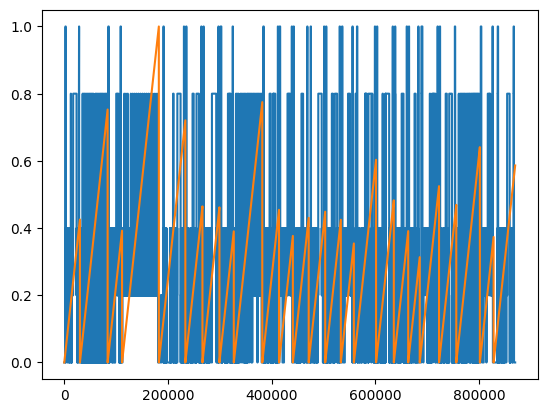

In [81]:
# print(dataset[244])
# print(type(X_train[0]))
# for x in X_train:
#     print(len(x))
# print(ans)
# print(len(ans))
# print(y)

import matplotlib.pyplot as plt

# plt.plot(X_train[0].iloc[:,0])
# plt.plot(dataset.iloc[:,0])
# plt.plot(dataset.iloc[0])
# for column in dataset.columns[:1]:#+dataset.columns[243:250]:
#     dataset[column] = dataset[column] / dataset[column].abs().max()
# for i in range(243,250):
#     plt.plot(dataset[i], alpha=.3)
plt.plot(dataset[243])
# # plt.plot(dataset[243])
plt.plot(dataset[0])
plt.show()


In [11]:
# ans = [y for _, y in dataset.groupby(dataset[dataset.columns[list(range(244,250+1))]])]
ans = [y for _, y in dataset.groupby(list(dataset)[244-1:250])]
# print(list(dataset)[244-1:250+1-1])

[243, 244, 245, 246, 247, 248, 249]


In [59]:
# @title teco-kit dataloader_opportunity_har.py
# https://github.com/teco-kit/timeseries-datasets/blob/main/dataloaders/dataloader_opportunity_har.py
import pandas as pd
import numpy as np
import os
# from dataloaders.dataloader_base import BASE_DATA
# TODO the cols ! name
# ========================================      Opportunity_HAR_DATA       =============================
# class Opportunity_HAR_DATA(BASE_DATA):
class Opportunity_HAR_DATA():
    """
    OPPORTUNITY Dataset for Human Activity Recognition from Wearable, Object, and Ambient Sensors
    Brief Description of the Dataset:
    ---------------------------------
    Each .dat file contains a matrix of data in text format.
    Each line contains the sensor data sampled at a given time (sample rate: 30Hz).
    For more detail . please reffer to the docomentation.html
    """
    def __init__(self):
        # In this documents in doc/documentation.html, all columns definition coulde be found   (or in the column_names)
        # the sensors between 134 and 248 are amounted on devices, so they will not to be considered
        # Specifically, the following columns were used for the challenge:
        # =============================================================
        # 1-37, 38-46, 51-59, 64-72, 77-85, 90-98, 103-134, 244, 250.
        # 0 milisconds
        self.used_cols = [#1,  2,   3, # Accelerometer RKN^
                          #4,  5,   6, # Accelerometer HIP
                          #7,  8,   9, # Accelerometer LUA^
                          #10, 11,  12, # Accelerometer RUA_
                          #13, 14,  15, # Accelerometer LH
                          #16, 17,  18, # Accelerometer BACK
                          #19, 20,  21, # Accelerometer RKN_
                          #22, 23,  24, # Accelerometer RWR
                          #25, 26,  27, # Accelerometer RUA^
                          #28, 29,  30, # Accelerometer LUA_
                          #31, 32,  33, # Accelerometer LWR
                          #34, 35,  36, # Accelerometer RH
                          37, 38,  39, 40, 41, 42, 43, 44, 45, # InertialMeasurementUnit BACK
                          50, 51,  52, 53, 54, 55, 56, 57, 58, # InertialMeasurementUnit RUA
                          63, 64,  65, 66, 67, 68, 69, 70, 71, # InertialMeasurementUnit RLA
                          76, 77,  78, 79, 80, 81, 82, 83, 84, # InertialMeasurementUnit LUA
                          89, 90,  91, 92, 93, 94, 95, 96, 97,  # InertialMeasurementUnit LLA
                          102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, # InertialMeasurementUnit L-SHOE
                          118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, # InertialMeasurementUnit R-SHOE
                          249  # Label
                         ]

        col_names         = ["dim_{}".format(i) for i in range(len(self.used_cols)-1)]
        self.col_names    =  col_names + ["activity_id"]

        self.label_map = [(0,      'Other'),
                          (406516, 'Open Door 1'),
                          (406517, 'Open Door 2'),
                          (404516, 'Close Door 1'),
                          (404517, 'Close Door 2'),
                          (406520, 'Open Fridge'),
                          (404520, 'Close Fridge'),
                          (406505, 'Open Dishwasher'),
                          (404505, 'Close Dishwasher'),
                          (406519, 'Open Drawer 1'),
                          (404519, 'Close Drawer 1'),
                          (406511, 'Open Drawer 2'),
                          (404511, 'Close Drawer 2'),
                          (406508, 'Open Drawer 3'),
                          (404508, 'Close Drawer 3'),
                          (408512, 'Clean Table'),
                          (407521, 'Drink from Cup'),
                          (405506, 'Toggle Switch')]
        self.drop_activities = []
        self.train_keys   = [11,12,13,14,15,16,
                             21,22,23,      26,
                             31,32,33,      36,
                             41,42,43,44,45,46]
        # 'S1-ADL1.dat', 'S1-ADL2.dat', 'S1-ADL3.dat', 'S1-ADL4.dat',  'S1-ADL5.dat', 'S1-Drill.dat', # subject 1
        # 'S2-ADL1.dat', 'S2-ADL2.dat', 'S2-ADL3.dat',                                'S2-Drill.dat', # subject 2
        # 'S3-ADL1.dat', 'S3-ADL2.dat', 'S3-ADL3.dat',                                'S3-Drill.dat'  # subject 3
        # 'S4-ADL1.dat', 'S4-ADL2.dat', 'S4-ADL3.dat', 'S4-ADL4.dat'   'S4-ADL5.dat', 'S4-Drill.dat'] # subject 4
        self.vali_keys    = [ ]
        # 'S2-ADL4.dat', 'S2-ADL5.dat','S3-ADL4.dat', 'S3-ADL5.dat'
        self.test_keys    = [24,25,34,35]

        self.LOCV_keys = [[1],[2],[3],[4]]
        self.all_keys = [1,2,3,4]
        self.sub_ids_of_each_sub = {}

        self.file_encoding = {'S1-ADL1.dat':11, 'S1-ADL2.dat':12, 'S1-ADL3.dat':13, 'S1-ADL4.dat':14, 'S1-ADL5.dat':15, 'S1-Drill.dat':16,
                              'S2-ADL1.dat':21, 'S2-ADL2.dat':22, 'S2-ADL3.dat':23, 'S2-ADL4.dat':24, 'S2-ADL5.dat':25, 'S2-Drill.dat':26,
                              'S3-ADL1.dat':31, 'S3-ADL2.dat':32, 'S3-ADL3.dat':33, 'S3-ADL4.dat':34, 'S3-ADL5.dat':35, 'S3-Drill.dat':36,
                              'S4-ADL1.dat':41, 'S4-ADL2.dat':42, 'S4-ADL3.dat':43, 'S4-ADL4.dat':44, 'S4-ADL5.dat':45, 'S4-Drill.dat':46}

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))
        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super().__init__()

    def load_all_the_data(self, root_path):
        file_list = os.listdir(root_path)
        file_list = [file for file in file_list if file[-3:]=="dat"] # in total , it should be 24
        assert len(file_list) == 24
        df_dict = {}
        for file in file_list:
            sub_data = pd.read_table(os.path.join(root_path,file), header=None, sep='\s+')
            sub_data = sub_data.iloc[:,self.used_cols]
            sub_data.columns = self.col_names
            # TODO check missing labels?
            sub_data = sub_data.interpolate(method='linear', limit_direction='both')
            sub = int(file[1]) # subject number
            sub_data['sub_id'] = self.file_encoding[file] # file index
            sub_data["sub"] = sub
            if sub not in self.sub_ids_of_each_sub.keys():
                self.sub_ids_of_each_sub[sub] = []
            self.sub_ids_of_each_sub[sub].append(self.file_encoding[file])
            df_dict[self.file_encoding[file]] = sub_data

        # all data
        df_all = pd.concat(df_dict)
        df_all = df_all.set_index('sub_id')
        # reorder the columns as sensor1, sensor2... sensorn, sub, activity_id
        df_all = df_all[self.col_names[:-1]+["sub"]+["activity_id"]]
        # label transformation
        df_all["activity_id"] = df_all["activity_id"].map(self.labelToId)
        data_y = df_all.iloc[:,-1]
        data_x = df_all.iloc[:,:-1]
        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub,
        return data_x, data_y


# p=Opportunity_HAR_DATA()
data_x, data_y = p.load_all_the_data(path)


 ----------------------- load all the data -------------------


sub_id
22    0
22    0
22    0
22    0
22    0
     ..
41    0
41    0
41    0
41    0
41    0
Name: activity_id, Length: 869387, dtype: int64


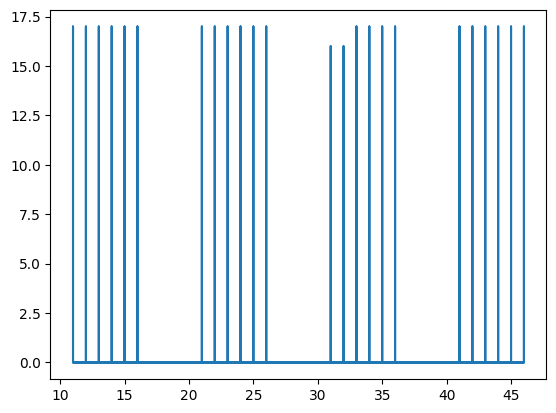

In [62]:
# print(data_x)
print(data_y)
plt.plot(data_y)
plt.show()


In [ ]:
# with open('/content/OpportunityUCIDataset/dataset/column_names.txt') as f:
#     # columns = [line.split()[1] for line in f.readlines()]
#     print(f.readlines())


['Data columns:\n', '\n', 'Column: 1 MILLISEC\n', 'Column: 2 Accelerometer RKN^ accX; value = round(original_value), unit = milli g\n', 'Column: 3 Accelerometer RKN^ accY; value = round(original_value), unit = milli g\n', 'Column: 4 Accelerometer RKN^ accZ; value = round(original_value), unit = milli g\n', 'Column: 5 Accelerometer HIP accX; value = round(original_value), unit = milli g\n', 'Column: 6 Accelerometer HIP accY; value = round(original_value), unit = milli g\n', 'Column: 7 Accelerometer HIP accZ; value = round(original_value), unit = milli g\n', 'Column: 8 Accelerometer LUA^ accX; value = round(original_value), unit = milli g\n', 'Column: 9 Accelerometer LUA^ accY; value = round(original_value), unit = milli g\n', 'Column: 10 Accelerometer LUA^ accZ; value = round(original_value), unit = milli g\n', 'Column: 11 Accelerometer RUA_ accX; value = round(original_value), unit = milli g\n', 'Column: 12 Accelerometer RUA_ accY; value = round(original_value), unit = milli g\n', 'Col

In [ ]:
# print(df)
print(dataset)
# print([len(df) for df in X_train])
# for df in ans:
#     print(df['activityID'].iloc[0], df['subject'].iloc[0], len(df))
# X_train = [df.drop(['subject', 'activityID'], axis=1) for df in ans]


# print(dataset)
# print(X_train[1])
# print(X_train[1].reset_index(drop=True))
# print(X_train[0].interpolate(method='index', axis=0, limit_direction='both'))
# print(X_train[0].interpolate(method='index', axis=0, limit_direction='both').isnull().sum())
# print(X_train[0].isnull().sum())
# print(y_train)

              0     1       2      3      4      5      6      7       8  \
0             0  30.0  1020.0  211.0 -176.0  977.0  320.0 -218.0   988.0   
1            33  19.0  1023.0  257.0 -185.0  949.0  334.0 -220.0   994.0   
2            67  16.0  1031.0  216.0 -196.0  974.0  315.0 -231.0  1003.0   
3           100  14.0  1029.0  238.0 -186.0  975.0  324.0 -222.0   996.0   
4           133  15.0  1031.0  183.0 -187.0  946.0  312.0 -224.0   989.0   
...         ...   ...     ...    ...    ...    ...    ...    ...     ...   
869382  1108922   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   
869383  1108956   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   
869384  1108989   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   
869385  1109022   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   
869386  1109056   NaN     NaN    NaN    NaN    NaN    NaN    NaN     NaN   

           9  ...     241     242  243  244  245  246  247  248  249  \
0       -5.0  .

In [ ]:
# @title Navidfoumani/Series2Vec opportunity loader
# https://github.com/Navidfoumani/Series2Vec/blob/main/Dataset/Benchmarks/Opportunity/Opportunity_Loader.py
import os
import logging
import requests
import zipfile

import csv
import numpy as np
from pandas import Series

logger = logging.getLogger(__name__)
# Main function for downloading and processing the Opportunity Datasets
# Returns the train and test sets

# Hardcoded number of sensor channels employed in the OPPORTUNITY challenge
NB_SENSOR_CHANNELS = 113
test_files = ['S2-ADL4.dat', 'S2-ADL5.dat', 'S3-ADL4.dat', 'S3-ADL5.dat']
NORM_MAX_THRESHOLDS = [3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       250,    25,     200,    5000,   5000,   5000,   5000,   5000,   5000,
                       10000,  10000,  10000,  10000,  10000,  10000,  250,    250,    25,
                       200,    5000,   5000,   5000,   5000,   5000,   5000,   10000,  10000,
                       10000,  10000,  10000,  10000,  250, ]

NORM_MIN_THRESHOLDS = [-3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -250,   -100,   -200,   -5000,  -5000,  -5000,  -5000,  -5000,  -5000,
                       -10000, -10000, -10000, -10000, -10000, -10000, -250,   -250,   -100,
                       -200,   -5000,  -5000,  -5000,  -5000,  -5000,  -5000,  -10000, -10000,
                       -10000, -10000, -10000, -10000, -250, ]


def Opportunity(window_size, step):
    # Build data
    Data = {}
    # Get the current directory path
    current_path = os.getcwd()
    data_path = os.path.join(current_path, 'Datasets/Opportunity/Opportunity.npy')
    if os.path.exists(data_path):
        logger.info("Loading preprocessed Opportunity data ...")

        Data_npy = np.load(data_path, allow_pickle=True)
        Data['train_data'] = Data_npy.item().get('train_data')
        Data['train_label'] = Data_npy.item().get('train_label')
        Data['test_data'] = Data_npy.item().get('test_data')
        Data['test_label'] = Data_npy.item().get('test_label')

        logger.info("{} samples will be used for training".format(len(Data['train_label'])))
        logger.info("{} samples will be used for testing".format(len(Data['test_label'])))

    else:
        Downloader(current_path)
        train_x, test_x, train_y, test_y = generate_data(current_path, label="gestures")
        X_train, y_train = Windowed_majority_labeling(train_x, np.int64(train_y), window_size, step)
        X_test, y_test = Windowed_majority_labeling(test_x, np.int64(test_y), window_size, step)

        logger.info("{} samples will be used for training".format(len(y_train)))
        logger.info("{} samples will be used for testing".format(len(y_test)))

        Data['train_data'] = X_train
        Data['train_label'] = y_train
        Data['test_data'] = X_test
        Data['test_label'] = y_test

        if not os.path.exists(current_path +'/Datasets/Opportunity/'):
            os.makedirs(current_path + '/Datasets/Opportunity/')
        np.save(current_path + '/Datasets/Opportunity/Opportunity.npy', Data, allow_pickle=True)
    return Data


def Downloader(current_path):
    # Define the path to check
    path_to_check = os.path.join(current_path, 'Opportunity/OpportunityUCIDataset')
    # Check if the path exists
    if not os.path.exists(path_to_check):
        # URL to download the PAMAP2 from
        file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00226/OpportunityUCIDataset.zip'
        # Send a GET request to download the file
        response = requests.get(file_url, stream=True)

        # Check if the request was successful
        if response.status_code == 200:
            # Create the directory if it doesn't exist
            os.makedirs(path_to_check, exist_ok=True)

            # Save the downloaded file
            file_path = os.path.join(path_to_check, 'PAMAP2_Dataset.zip')
            with open(file_path, 'wb') as file:
                # Track the progress of the download
                total_size = int(response.headers.get('content-length', 0))
                block_size = 1024 * 1024 * 100  # 1KB
                downloaded_size = 0

                for data in response.iter_content(block_size):
                    file.write(data)
                    downloaded_size += len(data)

                    # Calculate the download progress percentage
                    progress = (downloaded_size / total_size) * 100

                    # Print the progress message
                    print(f'OpportunityUCIDataset Download in progress: {progress:.2f}%')

            # Extract the contents of the zip file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(path_to_check)

            # Remove the downloaded zip file
            os.remove(file_path)

            print('OpportunityUCIDataset Datasets downloaded and extracted successfully.')
        else:
            print('Failed to download the OpportunityUCIDataset please update the file_url')
    else:
        print('OpportunityUCIDataset Datasets Raw file already exists.')
    return


def read_file(current_path):
    data = []
    labels = []
    label_map = [
        (0, 'Other'),
        (406516, 'Open Door 1'),
        (406517, 'Open Door 2'),
        (404516, 'Close Door 1'),
        (404517, 'Close Door 2'),
        (406520, 'Open Fridge'),
        (404520, 'Close Fridge'),
        (406505, 'Open Dishwasher'),
        (404505, 'Close Dishwasher'),
        (406519, 'Open Drawer 1'),
        (404519, 'Close Drawer 1'),
        (406511, 'Open Drawer 2'),
        (404511, 'Close Drawer 2'),
        (406508, 'Open Drawer 3'),
        (404508, 'Close Drawer 3'),
        (408512, 'Clean Table'),
        (407521, 'Drink from Cup'),
        (405506, 'Toggle Switch')
    ]
    labelToId = {str(x[0]): i for i, x in enumerate(label_map)}
    folder_path = os.path.join(current_path, 'Opportunity/OpportunityUCIDataset/OpportunityUCIDataset/dataset')
    cols = [38, 39, 40, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 77, 78, 79, 80, 81, 82, 83, 84, 85, 90, 91, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105,
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
            125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 250]
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.dat'):
            # Read the file
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                reader = csv.reader(f, delimiter=' ')
                for line in reader:
                    elem = []
                    for ind in cols:
                        elem.append(line[ind-1])
                    if sum([x == 'NaN' for x in elem]) < 5:
                        data.append([float(x) / 1000 for x in elem[:-1]])
                        labels.append(labelToId[elem[-1]])

    return data, labels


def select_columns_opp(data):
    """Selection of the 113 columns employed in the OPPORTUNITY challenge

    :param data: numpy integer matrix
        Sensor data (all features)
    :return: numpy integer matrix
        Selection of features
    """

    #                     included-excluded
    features_delete = np.arange(46, 50)
    features_delete = np.concatenate([features_delete, np.arange(59, 63)])
    features_delete = np.concatenate([features_delete, np.arange(72, 76)])
    features_delete = np.concatenate([features_delete, np.arange(85, 89)])
    features_delete = np.concatenate([features_delete, np.arange(98, 102)])
    features_delete = np.concatenate([features_delete, np.arange(134, 243)])
    features_delete = np.concatenate([features_delete, np.arange(244, 249)])
    return np.delete(data, features_delete, 1)


def normalize(data, max_list, min_list):
    """Normalizes all sensor channels

    :param data: numpy integer matrix
        Sensor data
    :param max_list: numpy integer array
        Array containing maximums values for every one of the 113 sensor channels
    :param min_list: numpy integer array
        Array containing minimum values for every one of the 113 sensor channels
    :return:
        Normalized sensor data
    """
    max_list, min_list = np.array(max_list), np.array(min_list)
    diffs = max_list - min_list
    for i in np.arange(data.shape[1]):
        data[:, i] = (data[:, i]-min_list[i])/diffs[i]
    #     Checking the boundaries
    data[data > 1] = 0.99
    data[data < 0] = 0.00
    return data


def divide_x_y(data, label):
    """Segments each sample into features and label

    :param data: numpy integer matrix
        Sensor data
    :param label: string, ['gestures' (default), 'locomotion']
        Type of activities to be recognized
    :return: numpy integer matrix, numpy integer array
        Features encapsulated into a matrix and labels as an array
    """

    data_x = data[:, 1:114]
    if label not in ['locomotion', 'gestures']:
            raise RuntimeError("Invalid label: '%s'" % label)
    if label == 'locomotion':
        data_y = data[:, 114]  # Locomotion label
    elif label == 'gestures':
        data_y = data[:, 115]  # Gestures label

    return data_x, data_y


def adjust_idx_labels(data_y, label):
    """Transforms original labels into the range [0, nb_labels-1]

    :param data_y: numpy integer array
        Sensor labels
    :param label: string, ['gestures' (default), 'locomotion']
        Type of activities to be recognized
    :return: numpy integer array
        Modified sensor labels
    """

    if label == 'locomotion':  # Labels for locomotion are adjusted
        data_y[data_y == 4] = 3
        data_y[data_y == 5] = 4
    elif label == 'gestures':  # Labels for gestures are adjusted
        data_y[data_y == 406516] = 1
        data_y[data_y == 406517] = 2
        data_y[data_y == 404516] = 3
        data_y[data_y == 404517] = 4
        data_y[data_y == 406520] = 5
        data_y[data_y == 404520] = 6
        data_y[data_y == 406505] = 7
        data_y[data_y == 404505] = 8
        data_y[data_y == 406519] = 9
        data_y[data_y == 404519] = 10
        data_y[data_y == 406511] = 11
        data_y[data_y == 404511] = 12
        data_y[data_y == 406508] = 13
        data_y[data_y == 404508] = 14
        data_y[data_y == 408512] = 15
        data_y[data_y == 407521] = 16
        data_y[data_y == 405506] = 17
    return data_y


def process_dataset_file(data, label):
    """Function defined as a pipeline to process individual OPPORTUNITY files

    :param data: numpy integer matrix
        Matrix containing data samples (rows) for every sensor channel (column)
    :param label: string, ['gestures' (default), 'locomotion']
        Type of activities to be recognized
    :return: numpy integer matrix, numy integer array
        Processed sensor data, segmented into features (x) and labels (y)
    """

    # Select correct columns
    data = select_columns_opp(data)
    # Colums are segmentd into features and labels
    data_x, data_y = divide_x_y(data, label)
    data_y = adjust_idx_labels(data_y, label)
    data_y = data_y.astype(int)

    # Perform linear interpolation
    data_x = np.array([Series(i).interpolate() for i in data_x.T]).T

    # Remaining missing data are converted to zero
    data_x[np.isnan(data_x)] = 0

    # All sensor channels are normalized
    data_x = normalize(data_x, NORM_MAX_THRESHOLDS, NORM_MIN_THRESHOLDS)

    return data_x, data_y


def generate_data(current_path, label):
    """Function to read the OPPORTUNITY challenge raw data and process all sensor channels

    :param current_path: string
        Path with original OPPORTUNITY zip file
    :param target_filename: string
        Processed file
    :param label: string, ['gestures' (default), 'locomotion']
        Type of activities to be recognized. The OPPORTUNITY dataset includes several annotations to perform
        recognition modes of locomotion/postures and recognition of sporadic gestures.
    """
    train_x = np.empty((0, NB_SENSOR_CHANNELS))
    train_y = np.empty(0)

    test_x = np.empty((0, NB_SENSOR_CHANNELS))
    test_y = np.empty(0)

    folder_path = os.path.join(current_path, 'Opportunity/OpportunityUCIDataset/OpportunityUCIDataset/dataset')

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.dat'):
            # Read the file
            file_path = os.path.join(folder_path, filename)
            data = np.loadtxt(file_path)
            x, y = process_dataset_file(data, label)
            if filename in test_files:
                test_x = np.vstack((test_x, x))
                test_y = np.concatenate([test_y, y])
            else:
                train_x = np.vstack((train_x, x))
                train_y = np.concatenate([train_y, y])

    return train_x, test_x, train_y, test_y


def Windowed_majority_labeling(values, labels, window_size, step):

    # Initialize empty lists to store windowed samples and labels
    windowed_samples = []
    window_labels = []

    for i in range(0, len(values) - window_size + 1, step):
        # Extract the windowed sample
        windowed_sample = values[i:i + window_size]

        # Assign the majority label to the window
        window_label = np.argmax(np.bincount(labels[i:i + window_size]))

        # Append the windowed sample and label to the lists
        windowed_samples.append(list(windowed_sample))
        window_labels.append(window_label)

    # Convert the windowed samples and labels to numpy arrays
    windowed_samples = np.transpose(np.array(windowed_samples), (0, 2, 1))
    window_labels = np.array(window_labels)
    return windowed_samples, window_labels


In [ ]:
# @title teco-kit opportunity loader
# https://github.com/teco-kit/timeseries-datasets/blob/main/dataloaders/dataloader_opportunity_har.py
import pandas as pd
import numpy as np
import os

# from dataloaders.dataloader_base import BASE_DATA
# TODO the cols ! name
# ========================================      Opportunity_HAR_DATA         =============================
# class Opportunity_HAR_DATA(BASE_DATA):
class Opportunity_HAR_DATA():
    """
    OPPORTUNITY Dataset for Human Activity Recognition from Wearable, Object, and Ambient Sensors

    Brief Description of the Dataset:
    ---------------------------------
    Each .dat file contains a matrix of data in text format.
    Each line contains the sensor data sampled at a given time (sample rate: 30Hz).
    For more detail . please reffer to the docomentation.html
    """
    def __init__(self, args):

        """
        root_path : Root directory of the data set
        difference (bool) : Whether to calculate the first order derivative of the original data
        datanorm_type (str) : Methods of data normalization: "standardization", "minmax" , "per_sample_std", "per_sample_minmax"

        spectrogram (bool): Whether to convert raw data into frequency representations
            scales : Depends on the sampling frequency of the data （sample rate: 30Hz)）
            wavelet : Methods of wavelet transformation

        """

        # In this documents in doc/documentation.html, all columns definition coulde be found   (or in the column_names)
        # the sensors between 134 and 248 are amounted on devices, so they will not to be considered
        # Specifically, the following columns were used for the challenge:
        # =============================================================
        # 1-37, 38-46, 51-59, 64-72, 77-85, 90-98, 103-134, 244, 250.
        # 0 milisconds
        self.used_cols = [#1,  2,   3, # Accelerometer RKN^
                          #4,  5,   6, # Accelerometer HIP
                          #7,  8,   9, # Accelerometer LUA^
                          #10, 11,  12, # Accelerometer RUA_
                          #13, 14,  15, # Accelerometer LH
                          #16, 17,  18, # Accelerometer BACK
                          #19, 20,  21, # Accelerometer RKN_
                          #22, 23,  24, # Accelerometer RWR
                          #25, 26,  27, # Accelerometer RUA^
                          #28, 29,  30, # Accelerometer LUA_
                          #31, 32,  33, # Accelerometer LWR
                          #34, 35,  36, # Accelerometer RH
                          37, 38,  39, 40, 41, 42, 43, 44, 45, # InertialMeasurementUnit BACK
                          50, 51,  52, 53, 54, 55, 56, 57, 58, # InertialMeasurementUnit RUA
                          63, 64,  65, 66, 67, 68, 69, 70, 71, # InertialMeasurementUnit RLA
                          76, 77,  78, 79, 80, 81, 82, 83, 84, # InertialMeasurementUnit LUA
                          89, 90,  91, 92, 93, 94, 95, 96, 97,  # InertialMeasurementUnit LLA
                          102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, # InertialMeasurementUnit L-SHOE
                          118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, # InertialMeasurementUnit R-SHOE
                          249  # Label
                         ]

        col_names         = ["dim_{}".format(i) for i in range(len(self.used_cols)-1)]
        self.col_names    =  col_names + ["activity_id"]

        self.label_map = [(0,      'Other'),
                          (406516, 'Open Door 1'),
                          (406517, 'Open Door 2'),
                          (404516, 'Close Door 1'),
                          (404517, 'Close Door 2'),
                          (406520, 'Open Fridge'),
                          (404520, 'Close Fridge'),
                          (406505, 'Open Dishwasher'),
                          (404505, 'Close Dishwasher'),
                          (406519, 'Open Drawer 1'),
                          (404519, 'Close Drawer 1'),
                          (406511, 'Open Drawer 2'),
                          (404511, 'Close Drawer 2'),
                          (406508, 'Open Drawer 3'),
                          (404508, 'Close Drawer 3'),
                          (408512, 'Clean Table'),
                          (407521, 'Drink from Cup'),
                          (405506, 'Toggle Switch')]


        self.drop_activities = []

        self.train_keys   = [11,12,13,14,15,16,
                             21,22,23,      26,
                             31,32,33,      36,
                             41,42,43,44,45,46]
        # 'S1-ADL1.dat', 'S1-ADL2.dat', 'S1-ADL3.dat', 'S1-ADL4.dat',  'S1-ADL5.dat', 'S1-Drill.dat', # subject 1
        # 'S2-ADL1.dat', 'S2-ADL2.dat', 'S2-ADL3.dat',                                'S2-Drill.dat', # subject 2
        # 'S3-ADL1.dat', 'S3-ADL2.dat', 'S3-ADL3.dat',                                'S3-Drill.dat'  # subject 3
        # 'S4-ADL1.dat', 'S4-ADL2.dat', 'S4-ADL3.dat', 'S4-ADL4.dat'   'S4-ADL5.dat', 'S4-Drill.dat'] # subject 4
        self.vali_keys    = [ ]
        # 'S2-ADL4.dat', 'S2-ADL5.dat','S3-ADL4.dat', 'S3-ADL5.dat'
        self.test_keys    = [24,25,34,35]

        self.exp_mode     = args.exp_mode
        if self.exp_mode == "LOCV":
            self.split_tag = "sub"
        else:
            self.split_tag = "sub_id"


        self.LOCV_keys = [[1],[2],[3],[4]]
        self.all_keys = [1,2,3,4]
        self.sub_ids_of_each_sub = {}

        self.file_encoding = {'S1-ADL1.dat':11, 'S1-ADL2.dat':12, 'S1-ADL3.dat':13, 'S1-ADL4.dat':14, 'S1-ADL5.dat':15, 'S1-Drill.dat':16,
                              'S2-ADL1.dat':21, 'S2-ADL2.dat':22, 'S2-ADL3.dat':23, 'S2-ADL4.dat':24, 'S2-ADL5.dat':25, 'S2-Drill.dat':26,
                              'S3-ADL1.dat':31, 'S3-ADL2.dat':32, 'S3-ADL3.dat':33, 'S3-ADL4.dat':34, 'S3-ADL5.dat':35, 'S3-Drill.dat':36,
                              'S4-ADL1.dat':41, 'S4-ADL2.dat':42, 'S4-ADL3.dat':43, 'S4-ADL4.dat':44, 'S4-ADL5.dat':45, 'S4-Drill.dat':46}

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]

        # super(Opportunity_HAR_DATA, self).__init__(args)



    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")

        file_list = os.listdir(root_path)
        file_list = [file for file in file_list if file[-3:]=="dat"] # in total , it should be 24
        assert len(file_list) == 24

        df_dict = {}

        for file in file_list:
            sub_data = pd.read_table(os.path.join(root_path,file), header=None, sep='\s+')
            sub_data =sub_data.iloc[:,self.used_cols]
            sub_data.columns = self.col_names

            # TODO check missing labels?
            sub_data = sub_data.interpolate(method='linear', limit_direction='both')

            sub = int(file[1])
            sub_data['sub_id'] = self.file_encoding[file]
            sub_data["sub"] = sub


            if sub not in self.sub_ids_of_each_sub.keys():
                self.sub_ids_of_each_sub[sub] = []
            self.sub_ids_of_each_sub[sub].append(self.file_encoding[file])

            df_dict[self.file_encoding[file]] = sub_data

        # all data
        df_all = pd.concat(df_dict)
        df_all = df_all.set_index('sub_id')
        # reorder the columns as sensor1, sensor2... sensorn, sub, activity_id
        df_all = df_all[self.col_names[:-1]+["sub"]+["activity_id"]]
        # label transformation
        df_all["activity_id"] = df_all["activity_id"].map(self.labelToId)
        data_y = df_all.iloc[:,-1]
        data_x = df_all.iloc[:,:-1]
        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub,
        return data_x, data_y

path = '/content/OpportunityUCIDataset/dataset/'
Opportunity_HAR_DATA().load_all_the_data(path)


TypeError: Opportunity_HAR_DATA.__init__() missing 1 required positional argument: 'args'

## fdsg

In [ ]:
# https://dl.acm.org/doi/pdf/10.1145/3460421.3480419
# https://github.com/mariusbock/dl-for-har/blob/main/data_processing/preprocess_data.py


## wisdm

In [83]:
!wget https://archive.ics.uci.edu/static/public/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
!unzip wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
!unzip wisdm-dataset.zip

--2025-06-09 07:47:13--  https://archive.ics.uci.edu/static/public/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip’

wisdm+smartphone+an     [   <=>              ] 295.92M  25.5MB/s    in 15s     

2025-06-09 07:47:27 (20.4 MB/s) - ‘wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip’ saved [310292805]

Archive:  wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
 extracting: WISDM-dataset-description.pdf  
 extracting: wisdm-dataset.zip       
Archive:  wisdm-dataset.zip
   creating: wisdm-dataset/
  inflating: wisdm-dataset/WISDM-dataset-description.pdf  
   creating: wisdm-dataset/arffmagic-master/
  inflating: wisdm-dataset/

In [ ]:
# @title rohanpandey WISDM
# https://github.com/rohanpandey/Analysis--WISDM-Smartphone-and-Smartwatch-Activity/blob/master/dataset_creation.ipynb
! wget https://archive.ics.uci.edu/static/public/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
!unzip wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
!unzip wisdm-dataset.zip

import os
import glob
import pandas as pd

folder1=glob.glob("wisdm-dataset/raw/*")
# print(folder1)
column_names = ['ID', 'activity','timestamp','x','y','z']
overall_dataframe=pd.DataFrame(columns = column_names)
for subfolder in folder1:
    parent_dir = "./processed/"
    path = os.path.join(parent_dir, subfolder.split('\\')[-1])
    if not os.path.exists(path): os.makedirs(path)
    folder2=glob.glob(subfolder+"/*")
    for subsubfolder in folder2:
        activity_dataframe = pd.DataFrame(columns = column_names)
        subfolder_path = os.path.join(path, subsubfolder.split('/')[-1])
        if not os.path.exists(subfolder_path): os.makedirs(subfolder_path)
        files=glob.glob(subsubfolder+"/*")
        for file in files:
            # print(file)
            df = pd.read_csv(file, sep=",",header=None)
            df.columns = ['ID','activity','timestamp','x','y','z']
            # activity_dataframe=activity_dataframe.append(df)
            activity_dataframe = pd.concat([activity_dataframe, df], ignore_index=True)

        activity_dataframe['z']=activity_dataframe['z'].str[:-1]
        # activity_dataframe['meter']=subsubfolder.split('/')[-1]
        # activity_dataframe['device']=subfolder.split('/')[-1]
        # activity_dataframe.to_csv(subfolder_path+'/data.csv',index=False)
        overall_dataframe = pd.concat([overall_dataframe, activity_dataframe], ignore_index=True)

overall_dataframe.to_csv("processed/wisdm-dataset/raw/data.csv",index=False)


In [ ]:
# @title wisdm dataloader
# RNNs https://colab.research.google.com/drive/16DZRFsBEPMTHnjDED1xlxBDZpCmp5XGR#scrollTo=IV5HmCFv_ITo
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas as pd

# /content/processed/wisdm-dataset/raw/phone/accel/data.csv
# /content/processed/wisdm-dataset/raw/watch/gyro/data.csv

class BufferDataset(Dataset):
    def __init__(self):
        # df_keep = pd.read_csv("data.csv")#[['ID','activity','timestamp','x','y','z']]
        df_keep = pd.read_csv("/content/processed/wisdm-dataset/raw/watch/accel/data.csv")

        user_acts = dict(tuple(df_keep.groupby(['ID','activity'])[['timestamp','x','y','z']]))
        self.data = [[d.to_numpy(), a] for a, d in user_acts.items()]
        self.act_dict = {i: act for i, act in enumerate(df_keep['activity'].unique())}
        self.act_invdict = {v: k for k, v in self.act_dict.items()} # {'A': 0, 'B': 1, ...

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, id_act = self.data[idx]
        id_act = self.process(id_act)
        return torch.tensor(x[:3500]), id_act # 3567

    def process(self, id_act):
        return int(id_act[0]), self.act_invdict[id_act[1]]

    def transform(self, act_list): # rand resize crop, rand mask # https://pytorch.org/vision/main/generated/torchvision.transforms.RandomResizedCrop.html
        act_list = np.array(act_list)
        try: hr, temp, heart= zip(*act_list)
        except ValueError: print('err:',act_list)
        kind = 'nearest' if len(act_list)>self.seq_len/.7 else 'linear'
        temp_interpolator = scipy.interpolate.interp1d(hr, temp, kind=kind) # linear nearest quadratic cubic
        heart_interpolator = scipy.interpolate.interp1d(hr, heart, kind=kind) # linear nearest quadratic cubic
        hr_ = np.sort(np.random.uniform(hr[0], hr[-1], round(self.seq_len*random.uniform(1,1/.7))))
        temp_, heart_ = temp_interpolator(hr_), heart_interpolator(hr_)
        act_list = list(zip(hr_, temp_, heart_))

        idx = torch.randint(len(act_list)-self.seq_len+1, size=(1,))
        # return act_list[idx: idx+self.seq_len]
        act_list = act_list[idx: idx+self.seq_len]

        # mask=(torch.rand(self.seq_len)<.1) # True -> masked # random masking
        # # act_list[mask] = self.pad[0]
        # act_list = [self.pad[0] if m else a for m,a in zip(mask, act_list)]
        return act_list

    def add(self, episode):
        self.data.append(episode)

import numpy as np
from matplotlib import pyplot as plt
def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(3, 3))
    # print(npimg.shape) # (3, 64, 64)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# df_keep = pd.read_csv("data.csv")#[['ID','activity','timestamp','x','y','z']]
# user_acts = dict(tuple(df_keep.groupby(['ID','activity'])[['timestamp','x','y','z']]))
# dataset = [[d.to_numpy(), a] for a, d in user_acts.items()]


train_data = BufferDataset() # one line of poem is roughly 50 characters

dataset_size = len(train_data)
indices = list(range(dataset_size))
split = int(np.floor(0.7 * dataset_size))
np.random.seed(0)
np.random.shuffle(indices)
train_indices, val_indices = indices[:split], indices[split:]

from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

from torch.utils.data.dataloader import DataLoader
batch_size = 64 #512
# train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size, num_workers=2, drop_last=True) # num_workers = 4
# test_loader = DataLoader(train_data, sampler=valid_sampler, batch_size=batch_size, num_workers=2, drop_last=True)
train_loader = DataLoader(train_data, sampler=train_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True) # num_workers = 4
test_loader = DataLoader(train_data, sampler=valid_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True)


In [ ]:
# @title from WISDM_ar_v1.1_raw.txt
# !wget https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
# !tar -xzf WISDM_ar_latest.tar.gz
path = '/content/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'
file = open(path)
lines = file.readlines()

processedList = []
# https://github.com/aakashratha1006/Human-Activity-Recognition/blob/main/human_activity_recognition.py
# https://github.com/lisatwyw/data-gym/blob/master/demo/WISDM.ipynb
for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '': break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except: print('Error at line number: ', i, line)

# with open(path, 'r') as f:
#     for line in f:
#         line = line.strip()
#         individual_record_strings = [rec.strip() for rec in line.split(';') if rec.strip()]
#         for record_str in individual_record_strings:
#             parts = record_str.split(',')
#             if len(parts) == 6: processedList.append(parts)
#             else: print(line)

# df = pd.read_table(path, header=None, sep='\s+')
# print(df)
# print(df.isna().sum())

import pandas as pd
columns = ['subject', 'activity','time','x','y','z']
dataset = pd.DataFrame(data = processedList, columns = columns)
# dataset = pd.DataFrame(data = processedList)

ans = [y for _, y in dataset.groupby(['subject', 'activity'])]
y=list(set([df['subject'].iloc[0] for df in ans]))
y.sort()

# dataset_size = len(train_data)
# indices = list(range(dataset_size))
# split = int(np.floor(0.7 * dataset_size))
# np.random.seed(0)
# np.random.shuffle(indices)
# train_indices, val_indices = indices[:split], indices[split:]

df_train = dataset[dataset['subject'].isin(y[:int(.7*len(y))])]
df_test = dataset[dataset['subject'].isin(y[-int(.3*len(y)):])]

def make_Xy(dataset):
    ans = [y for _, y in dataset.groupby(['subject', 'activity'])]
    y_train = [df['activity'].iloc[0] for df in ans]
    # y_train = [df['subject'].iloc[0] for df in ans]
    # X_train = [df[df.select_dtypes(include=['number'])].interpolate(method='index', axis=0, index=df['time'], limit_direction='both') for df in ans]
    # X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in X_train]
    X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in ans]
    X_train = [df.apply(pd.to_numeric, errors='coerce') for df in X_train] # Convert non-numeric data in dataset to numeric. errors='coerce': replace all non-numeric values with NaN.
    X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in X_train] # replace NaN by interpolating
    # X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in ans]
    return X_train, y_train

X_train, y_train = make_Xy(df_train)
X_test, y_test = make_Xy(df_test)



Error at line number:  281873 ['\n']
Error at line number:  281874 ['\n']
Error at line number:  281875 ['\n']


TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [ ]:

ans = [y for _, y in dataset.groupby(['subject', 'activity'])]
y_train = [df['activity'].iloc[0] for df in ans]
# y_train = [df['subject'].iloc[0] for df in ans]
# print(ans[0].select_dtypes(include=['number']))
# X_train = [df[df.select_dtypes(include=['number'])].interpolate(method='index', axis=0, index=df['time'], limit_direction='both') for df in ans]
X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in ans]
print(X_train[0])

X_train = [df.astype(float).interpolate(method='index', axis=0, limit_direction='both') for df in ans]



            x      y            z
337217  -1.73  10.31   0.53119355
337218  -1.18  11.92   -0.3405087
337219  -2.03   11.5     -1.56634
337220  -2.14   9.34   -2.1111538
337221  -3.76  11.88   -4.5628166
...       ...    ...          ...
343411   0.31  10.73  0.040861044
343412   2.76  10.95   0.84446156
343413    0.8  10.15     1.334794
343414  -1.57   8.69    1.4165162
343415  -2.56   8.58     1.879608

[6199 rows x 3 columns]


ValueError: could not convert string to float: 'Walking'

In [ ]:

# ans = [y for _, y in df_train.groupby(['subject', 'activity'])]
# y_train = [df['activity'].iloc[0] for df in ans]
# # y_train = [df['subject'].iloc[0] for df in ans]
# # X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in X_train]
# X_train = [df.interpolate(method='index', axis='time', limit_direction='both') for df in ans]
# print(X_train)
print(df_train)


       subject activity            time            x          y            z
8489        17  Walking  57869902574000    0.5720546    9.80665  -0.53119355
8490        17  Walking  57870012316000         -0.0   10.18802   -0.5720546
8491        17  Walking  57870122301000  -0.23154591   9.847511   -0.6946377
8492        17  Walking  57870222246000   0.14982383  10.079058  -0.50395286
8493        17  Walking  57870332292000   0.14982383  10.147159  -0.61291564
...        ...      ...             ...          ...        ...          ...
343411      11  Walking   1786872234000         0.31      10.73  0.040861044
343412      11  Walking   1786922282000         2.76      10.95   0.84446156
343413      11  Walking   1786972392000          0.8      10.15     1.334794
343414      11  Walking   1787022227000        -1.57       8.69    1.4165162
343415      11  Walking   1787072368000        -2.56       8.58     1.879608

[239520 rows x 6 columns]


In [15]:
# @title pandasDataset
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class pandasDataset(Dataset):
    def __init__(self, X, y):
        self.X, self.y = X, y
        chars = sorted(list(set(y)))
        self.vocab_size = len(chars) #
        self.stoi = {ch:i for i,ch in enumerate(chars)}
        self.itos = {i:ch for i,ch in enumerate(chars)}
        self.y = self.data_process(y) #
        self.seq_len = min([len(a) for a in X])
        print('seq_len',self.seq_len)

    def data_process(self, data): # str
        # return torch.tensor([self.stoi.get(c) for c in data]) #
        return np.array([self.stoi.get(c) for c in data]) #

    def __len__(self): return len(self.X)
    # def __getitem__(self, idx): return self.X.iloc[idx].to_numpy(), self.y.iloc[idx]
    # def __getitem__(self, idx): return self.X[idx].to_numpy(), self.y[idx]
    def __getitem__(self, idx):
        i = np.random.randint(0, len(self.X[idx])-self.seq_len+1)
        return self.X[idx].to_numpy()[i:i+self.seq_len].astype(float), self.y[idx]

train_data = pandasDataset(X_train, y_train)
test_data = pandasDataset(X_test, y_test)
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)

for X, y in train_loader:
    print(X.shape, y.shape)
    break



seq_len 1
seq_len 1
torch.Size([64, 1, 244]) torch.Size([64])


In [ ]:
# print(len(X_train)) # 49
for df in ans:
    print(df['subject'].iloc[0], df['activity'].iloc[0], len(df))
# y=list(set([int(df['subject'].iloc[0]) for df in ans]))
# y=list(set([df['subject'].iloc[0] for df in ans]))
# y.sort()
# print(y) # ['11', '13', '15', '17', '18', '20', '27', '29', '32', '33', '35', '36', '6']
# # print(len(y)) # 13
# y[:int(.7*len(y))]

# 1 256 2000+


subject101.dat 0 126460
subject101.dat 1 27187
subject101.dat 2 23480
subject101.dat 3 21717
subject101.dat 4 22253
subject101.dat 5 21265
subject101.dat 6 23575
subject101.dat 7 20265
subject101.dat 12 15890
subject101.dat 13 14899
subject101.dat 16 22941
subject101.dat 17 23573
subject101.dat 24 12912
subject102.dat 0 183651
subject102.dat 1 23430
subject102.dat 2 22345
subject102.dat 3 25576
subject102.dat 4 32533
subject102.dat 5 9238
subject102.dat 6 25108
subject102.dat 7 29739
subject102.dat 12 17342
subject102.dat 13 15213
subject102.dat 16 20683
subject102.dat 17 28880
subject102.dat 24 13262
subject103.dat 0 78495
subject103.dat 1 22044
subject103.dat 2 28761
subject103.dat 3 20533
subject103.dat 4 29036
subject103.dat 12 10389
subject103.dat 13 15275
subject103.dat 16 20325
subject103.dat 17 27975
subject104.dat 0 98155
subject104.dat 1 23047
subject104.dat 2 25492
subject104.dat 3 24706
subject104.dat 4 31932
subject104.dat 5 1
subject104.dat 6 22699
subject104.dat 7 27533


In [ ]:
with open(path, 'r') as f:
# #     # print(f.read())
    processedList = f.read().replace(' ', '').replace(',\n', '\n').replace('\n', '').replace(';','\n')
processedList = [p.split(',') for p in processedList.split('\n')]
# print(processedList[:100])

df = pd.DataFrame(data = processedList)

for i,p in enumerate(processedList):
    if len(p)>6:
        print(i, p)
    if i>800000: break

# 343419
# 844581


In [ ]:
with open(path, 'r') as f:
    for i, line in enumerate(f.read().split('\n')):
        print(line)
        if i>3: break


## pamap2

In [ ]:
# https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring
# https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring
!wget https://archive.ics.uci.edu/static/public/231/pamap2+physical+activity+monitoring.zip -O pamap2.zip
!unzip pamap2.zip
!unzip PAMAP2_Dataset.zip


In [ ]:
# @title pamap2 dataloader
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
!unzip PAMAP2_Dataset.zip

import pandas as pd
import numpy as np
import os

def load_pamap2(path='PAMAP2_Dataset', activities=[1,2,3,4,5,6,7,12,13,16,17,24]):
    cols = list(range(1, 54))  # 52 features + HR
    data = []
    for file in os.listdir(path):
        if file.endswith(".dat"):
            df = pd.read_csv(os.path.join(path, file), sep=' ', header=None, usecols=[0] + cols)
            df.columns = ['timestamp'] + [f'feat_{i}' for i in range(len(cols))]
            df = df.dropna()
            df['label'] = pd.read_csv(os.path.join(path, file), sep=' ', header=None, usecols=[0]).values
            data.append(df)
    full_df = pd.concat(data).dropna()
    return full_df

# df = load_pamap2()
# df = pd.read_csv('/content/PAMAP2_Dataset/Protocol/subject101.dat', sep=' ', header=None, usecols=[0] + cols)
df = pd.read_csv('/content/PAMAP2_Dataset/Protocol/subject101.dat', sep=' ', header=None)



In [18]:
# @title papmap2 me
import os
import numpy as np
import pandas as pd
# https://github.com/EdnaEze/Physical-Activity-Monitoring/blob/main/DSRM-Edna.ipynb

activities = {0:'transient', 1:'lying', 2:'sitting', 3:'standing', 4:'walking', 5:'running', 6:'cycling', 7:'Nordic_walking', 9:'watching_TV', 10:'computer_work', 11:'car driving', 12:'ascending_stairs', 13:'descending_stairs', 16:'vacuum_cleaning', 17:'ironing', 18:'folding_laundry', 19:'house_cleaning', 20:'playing_soccer', 24:'rope_jumping'}
all_columns = ["time", "activity", "heartrate", 'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

dataset = pd.DataFrame()

# path = '/content/OpportunityUCIDataset/dataset'
path = '/content/PAMAP2_Dataset/Protocol/'

usr_lst = os.listdir(path)
for file in os.listdir(path):
# for file, subject_id in zip(file_names, subject_id):
    df = pd.read_table(path+file, header=None, sep='\s+')
    df.columns = all_columns
    df['subject'] = file
    dataset = pd.concat([dataset, df], ignore_index=True)

y = dataset['subject'].unique()
y.sort()

# dataset_size = len(train_data)
# indices = list(range(dataset_size))
# split = int(np.floor(0.7 * dataset_size))
# np.random.seed(0)
# np.random.shuffle(indices)
# train_indices, val_indices = indices[:split], indices[split:]

df_train = dataset[dataset['subject'].isin(y[:int(.7*len(y))])]
df_test = dataset[dataset['subject'].isin(y[-int(.3*len(y)):])]

def make_Xy(dataset):
    anss = [y for _, y in dataset.groupby(['subject', 'activity'])]
    ans = []
    for x in anss:
        if len(x) > 1000: # only keep sequences with more than 1000 samples
            ans.append(x)
    y_train = [df['activity'].iloc[0] for df in ans]
    # y_train = [df['subject'].iloc[0] for df in ans]
    # X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in X_train]
    X_train = [df.drop(['subject', 'activity','time'], axis=1) for df in ans]
    # X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in ans]

    X_train = [df.apply(pd.to_numeric, errors='coerce') for df in X_train] # Convert non-numeric data in dataset to numeric. errors='coerce': replace all non-numeric values with NaN.
    X_train = [df.interpolate(method='index', axis=0, limit_direction='both') for df in X_train] # replace NaN by interpolating

    # X_train = [df.interpolate(method='values', axis=0, limit_direction='both') for df in ans]
    # data.reset_index(drop=True, inplace=True) # make row ind start from 0
    return X_train, y_train

X_train, y_train = make_Xy(df_train)
X_test, y_test = make_Xy(df_test)



In [17]:
# print(X_train[0])
# print([len(x) for x in X_train])
# print([y.tolist() for y in y_train])
# anss = []
# for x in ans:
#     if len(x) > 1000:
#         anss.append(x)
# print([len(x) for x in anss])

print(dataset['subject'].unique())
# print(dataset['activity'].unique())
# print(dataset['activity'].value_counts())


['subject102.dat' 'subject109.dat' 'subject105.dat' 'subject101.dat'
 'subject108.dat' 'subject104.dat' 'subject103.dat' 'subject107.dat'
 'subject106.dat']


## dsfbg

In [ ]:

https://github.com/Navidfoumani/Series2Vec/tree/main/Dataset/Benchmarks

# https://link.springer.com/article/10.1007/s10618-024-01043-w



In [ ]:
# @title eigenworm
!wget https://timeseriesclassification.com/aeon-toolkit/Worms.zip
!unzip har
!unzip 'UCI HAR Dataset.zip'
!mv 'UCI HAR Dataset' UCI_HAR_Dataset

# 131 train and 128 test. We have truncated each series to the shortest usable. Each series has 17984 observations. Each worm is classified as either wild-type (the N2 reference strain) or one of four mutant types: goa-1; unc-1; unc-38 and unc-63.


In [ ]:
# @title ECG Heartbeat Categorization Dataset

# https://www.kaggle.com/datasets/shayanfazeli/heartbeat

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shayanfazeli/heartbeat",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


In [ ]:
# @title simplex
!pip install -q opensimplex
import opensimplex
import numpy as np
import torch
import matplotlib.pyplot as plt

def simplexmask1d(seq=512, ctx_scale=(.85,1), trg_scale=(.6,.8), B=64, chaos=[1,.5]):
    i = np.linspace(0, chaos[0], num=seq) # 2-5
    noise = opensimplex.noise2array(i, np.random.randint(1e10, size=B)) # [B, seq]
    noise = torch.from_numpy(noise)
    # trunc_normal = torch.fmod(torch.randn(2)*.3,1)/2 + .5
    # print(trunc_normal)
    ctx_mask_scale = torch.rand(1) * (ctx_scale[1] - ctx_scale[0]) + ctx_scale[0] # in (min_s, max_s) # all blocks same size
    trg_mask_scale = torch.rand(1) * (trg_scale[1] - trg_scale[0]) + trg_scale[0]
    # ctx_mask_scale = trunc_normal[0] * (ctx_scale[1] - ctx_scale[0]) + ctx_scale[0] # in (min_s, max_s) # all blocks same size
    # trg_mask_scale = trunc_normal[1] * (trg_scale[1] - trg_scale[0]) + trg_scale[0]

    ctx_len, trg_len = int(seq*ctx_mask_scale), int(seq*trg_mask_scale)
    val, trg_index = torch.topk(noise, trg_len, dim=1, sorted=False)
    ctx_len = ctx_len - trg_len

    remove_mask = torch.ones((B,seq), dtype=bool) # [B, S]
    remove_mask.scatter_(1, trg_index, False).flatten()
    ind = torch.arange(seq).unsqueeze(0).repeat(B,1)[remove_mask].reshape(B, -1)

    i = np.linspace(0, chaos[1], num=seq) # 2-5
    noise = opensimplex.noise2array(i, np.random.randint(1e10, size=B)) # [B, seq]
    noise = torch.from_numpy(noise)[remove_mask].reshape(B, -1)
    val, ctx_ind = torch.topk(noise, ctx_len, dim=1, sorted=False)
    ctx_index = ind[torch.arange(B).unsqueeze(-1), ctx_ind]
    return ctx_index, trg_index

b=64
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.7,.8), trg_scale=(.4,.6), B=b, chaos=[3,.5])
ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.85,1), trg_scale=(.7,.8), B=b, chaos=[3,.5])
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.8,.9), trg_scale=(.7,.8), B=b, chaos=[1,.5])
mask = torch.zeros(b ,200)
mask[torch.arange(b).unsqueeze(-1), trg_index] = 1
mask[torch.arange(b).unsqueeze(-1), ctx_index] = .5
# mask = mask[None,...]
# mask = mask[:,None,None,:]#.repeat(1,3,1,1)
print(mask.shape)

# def imshow(img):
#     npimg = img.numpy()
#     plt.rcParams["figure.figsize"] = (8,4)
#     # plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.pcolormesh(np.transpose(npimg, (1, 2, 0)))
#     plt.show()
# # imshow(mask[0])
# import torchvision
# imshow(torchvision.utils.make_grid(mask, nrow=1))

# print(index)
# print(index.shape)
# print(mask)
# print(mask.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 7.3 MB/s eta 0:00:00
torch.Size([64, 200])


In [ ]:
# @title ijepa multiblock 1d
# https://github.com/facebookresearch/ijepa/blob/main/src/masks/multiblock.py
import torch

class MaskCollator(object):
    def __init__(self, length=200,
        enc_mask_scale=(0.2, 0.8), pred_mask_scale=(0.2, 0.8),
        nenc=1, npred=2, min_keep=4, allow_overlap=False):
        super().__init__()
        self.length = length
        self.enc_mask_scale = enc_mask_scale
        self.pred_mask_scale = pred_mask_scale
        self.nenc = nenc
        self.npred = npred
        self.min_keep = min_keep  # minimum number of patches to keep
        self.allow_overlap = allow_overlap  # whether to allow overlap b/w enc and pred masks

    def _sample_block_size(self, scale):
        _rand = torch.rand(1).item()
        # -- Sample block scale
        min_s, max_s = scale
        mask_scale = min_s + _rand * (max_s - min_s)
        max_keep = int(self.length * mask_scale) # num patches to keep
        # -- Sample block aspect-ratio
        # -- Compute block height and width (given scale and aspect-ratio)
        l = max_keep#int(round(math.sqrt(max_keep * aspect_ratio)))
        while l >= self.length: l -= 1 # crop mask to be smaller than img
        return l

    def _sample_block_mask(self, length, acceptable_regions=None):
        l = length
        def constrain_mask(mask, tries=0):
            """ Helper to restrict given mask to a set of acceptable regions """
            N = max(int(len(acceptable_regions)-tries), 0)
            for k in range(N):
                mask *= acceptable_regions[k]
        # --
        # -- Loop to sample masks until we find a valid one
        tries = 0
        timeout = og_timeout = 20
        valid_mask = False
        while not valid_mask:
            # -- Sample block top-left corner
            left = torch.randint(0, self.length - l, (1,))
            mask = torch.zeros(self.length, dtype=torch.int32)
            mask[left:left+l] = 1
            # -- Constrain mask to a set of acceptable regions
            if acceptable_regions is not None:
                constrain_mask(mask, tries)
            mask = torch.nonzero(mask.flatten())
            # -- If mask too small try again
            valid_mask = len(mask) > self.min_keep
            if not valid_mask:
                timeout -= 1
                if timeout == 0:
                    tries += 1
                    timeout = og_timeout
        mask = mask.squeeze()
        # --
        mask_complement = torch.ones(self.length, dtype=torch.int32)
        mask_complement[left:left+l] = 0
        # --
        return mask, mask_complement

    def __call__(self, B):
        '''
        Create encoder and predictor masks when collating imgs into a batch
        # 1. sample enc block (size + location) using seed
        # 2. sample pred block (size) using seed
        # 3. sample several enc block locations for each image (w/o seed)
        # 4. sample several pred block locations for each image (w/o seed)
        # 5. return enc mask and pred mask
        '''
        p_size = self._sample_block_size(scale=self.pred_mask_scale)
        e_size = self._sample_block_size(scale=self.enc_mask_scale)

        collated_masks_pred, collated_masks_enc = [], []
        min_keep_pred = self.length
        min_keep_enc = self.length
        for _ in range(B):

            masks_p, masks_C = [], []
            for _ in range(self.npred):
                mask, mask_C = self._sample_block_mask(p_size)
                masks_p.append(mask)
                masks_C.append(mask_C)
                min_keep_pred = min(min_keep_pred, len(mask))
            collated_masks_pred.append(masks_p)

            acceptable_regions = masks_C
            try:
                if self.allow_overlap:
                    acceptable_regions= None
            except Exception as e:
                print(f'Encountered exception in mask-generator {e}')

            masks_e = []
            for _ in range(self.nenc):
                mask, _ = self._sample_block_mask(e_size, acceptable_regions=acceptable_regions)
                masks_e.append(mask)
                min_keep_enc = min(min_keep_enc, len(mask))
            collated_masks_enc.append(masks_e)
        collated_masks_pred = [[cm[:min_keep_pred] for cm in cm_list] for cm_list in collated_masks_pred]
        collated_masks_pred = torch.utils.data.default_collate(collated_masks_pred)
        # --
        collated_masks_enc = [[cm[:min_keep_enc] for cm in cm_list] for cm_list in collated_masks_enc]
        collated_masks_enc = torch.utils.data.default_collate(collated_masks_enc)
        return collated_masks_enc, collated_masks_pred

batch=64
length=200
mask_collator = MaskCollator(length=length, enc_mask_scale=(.85, 1.), pred_mask_scale=(.15, .2),
        nenc=1, npred=4, min_keep=4,
        # allow_overlap=True)
        allow_overlap=False)

collated_masks_enc, collated_masks_pred = mask_collator(batch)
context_indices, trg_indices = torch.stack(collated_masks_enc).squeeze(0), torch.stack(collated_masks_pred).transpose(0,1).flatten(1).unique(dim=1) # [num_msk, b,num_tok]->[b,num_tok] # [64, 65], [64, 32]
# print(context_indices.shape, trg_indices.shape)


# plt.pcolormesh(mask)
b=64
mask = torch.zeros(batch ,length)
mask[torch.arange(batch).unsqueeze(-1), trg_indices] = 1
mask[torch.arange(batch).unsqueeze(-1), context_indices] = .5
# mask = mask[None,...]
# print(mask.shape)
# mask = mask[:,None,None,:]#.repeat(1,3,1,1)
# print(mask.shape)

# import numpy as np
# import matplotlib.pyplot as plt
# def imshow(img):
#     npimg = img.numpy()
#     plt.rcParams["figure.figsize"] = (8,4)
#     # plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.pcolormesh(np.transpose(npimg, (1, 2, 0)))
#     # plt.imshow(npimg)
#     plt.show()
# # imshow(mask)
# import torchvision
# print(torchvision.utils.make_grid(mask, nrow=1).shape)
# # imshow(torchvision.utils.make_grid(mask, nrow=8))
# imshow(torchvision.utils.make_grid(mask, nrow=1))



In [ ]:
# @title RoPE
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def RoPE(dim, seq_len=512, base=10000):
    theta = 1.0 / (base ** (torch.arange(0, dim, step=2) / dim))
    pos = torch.arange(seq_len).unsqueeze(-1)
    angles = (pos * theta)[None,...,None] # [seq_len, 1] * [dim // 2] -> [1, seq_len, dim // 2, 1]
    rot_emb = torch.cat([torch.sin(angles), torch.cos(angles)], dim=-1).flatten(-2).to(device) # [1, seq_len, dim // 2, 2] -> [1, seq_len, dim]
    return rot_emb

# class RoPE(nn.Module): # Rotary Positional Embeddings
#     def __init__(self, dim, seq_len=512, base=10000):
#         super().__init__()
#         self.dim, self.base = dim, base
#         theta = 1.0 / (base ** (torch.arange(0, dim, step=2) / dim))
#         pos = torch.arange(seq_len).unsqueeze(-1)
#         angles = (pos * theta)[None,...,None] # [seq_len, 1] * [dim // 2] -> [1, seq_len, dim // 2, 1]
#         self.rot_emb = torch.cat([torch.sin(angles), torch.cos(angles)], dim=-1).flatten(-2).to(device) # [seq_len, dim // 2, 2] -> [1, seq_len, dim]

#     def forward(self, x):
#         seq_len = x.size(1)
#         if self.rot_emb.shape[0] < seq_len: self.__init__(self.dim, seq_len, self.base)
#         return x * self.rot_emb[:seq_len]

class RotEmb(nn.Module): # Rotary Positional Embeddings
    def __init__(self, dim, top=torch.pi, base=10000):
        super().__init__()
        self.theta = top / (base ** (torch.arange(0, dim, step=2, device=device) / dim))
        # self.theta = top / (base ** torch.linspace(0, 1, dim//2, device=device))

    def forward(self, pos): # [batch] in [0,1]
        angles = (pos.unsqueeze(-1) * self.theta).unsqueeze(-1) # [seq_len, 1] * [dim // 2] -> [seq_len, dim // 2, 1]
        rot_emb = torch.cat([torch.sin(angles), torch.cos(angles)], dim=-1) # [seq_len, dim // 2, 2]
        return rot_emb.flatten(-2) # [seq_len, dim]


In [ ]:
# @title AttentionBlock
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'


import math
def StableInit(m): # https://openreview.net/pdf?id=lkRjnNW0gb
    if isinstance(m, nn.Linear):
        # W ~ N(0, ( 1/ (sqrt(n_in) + sqrt(n_out)) )^2 )
        # want std = 1/ (sqrt(n_in) + sqrt(n_out))
        # n_in, n_out = module.weight.shape[0], module.weight.shape[1]
        n_in, n_out = m.weight.shape
        torch.nn.init.normal_(m.weight, std=1/(math.sqrt(n_in)+math.sqrt(n_out)))
        if m.bias is not None:
            nn.init.zeros_(m.bias)


def zero_module(module):
    for p in module.parameters():
        p.detach().zero_()
    return module

class SelfAttn(nn.Module):
    def __init__(self, dim, n_heads):
        super().__init__()
        self.dim, self.n_heads = dim, n_heads
        d_head = dim//n_heads
        self.qkv = nn.Linear(dim, dim*3, bias=False)
        # self.lin = nn.Linear(dim, dim)
        self.lin = zero_module(nn.Linear(dim, dim))
        # self.rope = RoPE(d_head, seq_len=512, base=10000)
        # self.rope = RoPE2D(d_head, h=64, w=64, base=100)
        self.scale = d_head**-.5
        # torch.nn.init.normal_(self.qkv.weight, std=.02)
        # self.qkv.apply(StableInit)

    def forward(self, x): # [b,t,d]
        q,k,v = self.qkv(x).unflatten(-1, (self.n_heads,-1)).transpose(1,2).chunk(3, dim=-1) # [b, t, n_heads, d_head] -> [b, n_heads, t, d_head]
        # q, k = self.rope(q), self.rope(k)
        q, k = q.softmax(dim=-1)*self.scale, k.softmax(dim=-2)
        context = k.transpose(-2,-1) @ v # [batch, n_heads, d_head, d_head]
        x = q @ context # [b, n_heads, t, d_head]
        # print('SelfAttn', x.shape)
        x = x.transpose(1,2).flatten(2)
        return self.lin(x)



class SwiGLU(nn.Module): # https://arxiv.org/pdf/2002.05202
    def __init__(self, d_model, ff_dim): # d_model * 3*ff_dim params
        super().__init__()
        self.lin0 = nn.Linear(d_model, 2*ff_dim, bias=False)
        self.lin1 = zero_module(nn.Linear(ff_dim, d_model, bias=False))

    def forward(self, x): # [b,t,d]
        x0, x1 = self.lin0(x).chunk(2, dim=-1)
        return self.lin1(x0*F.silu(x1))


class AttentionBlock(nn.Module):
    def __init__(self, d_model, n_heads, mult=4, drop=0.):
        super().__init__()
        self.d_model = d_model
        # self.norm = nn.RMSNorm(d_model, elementwise_affine=False) # LayerNorm RMSNorm
        self.norm1, self.norm2 = nn.LayerNorm(d_model), nn.LayerNorm(d_model)
        self.drop = nn.Dropout(drop)
        self.attn = SelfAttn(d_model, n_heads)
        act = nn.GELU() # ReLU GELU
        # act = Swwish()
        ff_dim=d_model*mult
        self.ff = nn.Sequential(
            # nn.RMSNorm(d_model), act, nn.Dropout(drop), nn.Linear(d_model, ff_dim),
            # nn.RMSNorm(ff_dim), act, nn.Dropout(drop), zero_module(nn.Linear(ff_dim, d_model))
            nn.RMSNorm(d_model), nn.Linear(d_model, ff_dim), act,
            # nn.RMSNorm(d_model), nn.Dropout(drop), nn.Linear(d_model, ff_dim), act,
            nn.RMSNorm(ff_dim), nn.Dropout(drop), zero_module(nn.Linear(ff_dim, d_model))
        )
        # self.ff = SwiGLU(d_model, ff_dim)


    def forward(self, x): # [batch, seq_len, d_model]
        # print('attnblk fwd',x.shape)
        x = x + self.drop(self.attn(self.norm1(x)))
        x = x + self.ff(x)
        # x = x + self.drop(self.ff(self.norm2(x)))
        return x


In [ ]:
# @title scheduler
from torch.optim.lr_scheduler import LambdaLR
import math
def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5, last_epoch=-1):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))
    return LambdaLR(optimizer, lr_lambda, last_epoch)

# total_steps=100
# base_lr, max_lr = 3e-5, 3e-4

# import torch
# model=torch.nn.Linear(2,3)
# optim = torch.optim.AdamW(model.parameters(), lr=base_lr, betas=(0.9, 0.999))

# scheduler = get_cosine_schedule_with_warmup(optim, num_warmup_steps=20 , num_training_steps=total_steps) # https://docs.pytorch.org/torchtune/0.2/generated/torchtune.modules.get_cosine_schedule_with_warmup.html
# # scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=max_lr, total_steps=total_steps, pct_start=0.45, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=div_factor, final_div_factor=100.0, three_phase=True,)

# lr_lst=[]
# import matplotlib.pyplot as plt
# for t in range(total_steps):
#     lr=optim.param_groups[0]["lr"]
#     lr_lst.append(lr)
#     scheduler.step()
# plt.plot(lr_lst)



In [ ]:
# @title TransformerModel/Predictor
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class TransformerPredictor(nn.Module):
    def __init__(self, in_dim, d_model, out_dim=None, n_heads=4, d_hid=None, nlayers=1, drop=0.):
        super().__init__()
        self.embed = nn.Linear(in_dim, d_model)# if in_dim != d_model else None
        # self.pos_enc = RotEmb(d_model, top=1, base=10000)
        # self.pos_emb = nn.Parameter(torch.randn(1, 256, d_model)*.02) # 200
        self.pos_emb = RoPE(d_model, seq_len=256, base=10000) # 256

        # self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads) for _ in range(nlayers)])
        self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads, drop=drop) for _ in range(nlayers)])

        self.cls = nn.Parameter(torch.randn(1,1,d_model)*0.02) # randn zeros
        out_dim = out_dim or d_model
        self.norm = nn.RMSNorm(d_model) # LayerNorm RMSNorm
        self.lin = nn.Linear(d_model, out_dim)# if out_dim != d_model else None

        # torch.nn.init.normal_(self.embed.weight, std=.02)
        # if self.lin: torch.nn.init.normal_(self.lin.weight, std=.02)


    def forward(self, x, context_indices, trg_indices): # [batch, seq_len, d_model], [batch, seq_len] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        x = self.embed(x) # [batch, seq_len, d_model] or [batch, num_context_toks, d_model]
        batch, seq, dim = x.shape
        # x = x * self.pos_enc(context_indices)
        # print("Trans pred",x.shape, self.pos_emb[0,context_indices].shape)
        x = x + self.pos_emb[0,context_indices]
        # x = x * self.pos_emb[0,context_indices]
        # print('pred fwd', self.pos_emb[:,context_indices].shape)

        # pred_tokens = self.cls * self.pos_enc(trg_indices) # [M, num_trg_toks, d_model]
        pred_tokens = self.cls + self.pos_emb[0,trg_indices]
        # pred_tokens = self.cls * self.pos_emb[0,trg_indices]
        # print("pred fwd", x.shape, pred_tokens.shape)
        x = torch.cat([x, pred_tokens], dim=1) # [batch, seq_len+num_trg_toks, d_model]
        out = self.transformer(x)

        out = self.norm(out)
        out = out[:,seq:] # [batch, num_trg_toks, d_model]
        out = self.lin(out)
        return out # [seq_len, batch_size, ntoken]

# class SLSTM(nn.Module):
#     def __init__(self, d_model, num_layers=2, batch_first=True):
#         super().__init__()
#         self.lstm = nn.LSTM(d_model, d_model, num_layers)

#     def forward(self, x): # [b,c,t]
#         x = x + self.lstm(x.transpose(-2,-1))[0].transpose(-2,-1) # skip=True
#         return x


class TransformerModel(nn.Module):
    # def __init__(self, in_dim, d_model, out_dim=None, nhead=8, d_hid=None, nlayers=1, drop=0):
    def __init__(self, patch_size, in_dim, d_model, out_dim=None, n_heads=4, nlayers=1, drop=0):
        super().__init__()
        patch_size=8
        act = nn.ReLU() # ReLU SiLU GELU
        # act = LearntSwwish(d_model) # SnakeBeta LearntSwwish
        # act1 = LearntSwwish(d_model) # SnakeBeta LearntSwwish
        # act = Swwish()
        self.embed = nn.Sequential(
            # # nn.Conv1d(in_dim, d_model,7,2,7//2), nn.MaxPool1d(2,2), #nn.MaxPool1d(3, 2, 3//2),
            # # nn.Conv1d(in_dim, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.Conv1d(d_model, d_model,3,2,3//2)
            nn.Conv1d(in_dim, d_model,7,2,7//2), nn.BatchNorm1d(d_model), act,
            nn.Conv1d(d_model, d_model,5,2,5//2), nn.BatchNorm1d(d_model), act,
            # nn.Conv1d(in_dim, d_model,3,2,3//2), nn.BatchNorm1d(d_model), act, #nn.MaxPool1d(2,2),
            # nn.Conv1d(d_model, d_model,3,2,3//2), nn.BatchNorm1d(d_model), act, #nn.MaxPool1d(2,2),
            nn.Conv1d(d_model, d_model,3,2,3//2),
            # nn.Conv1d(in_dim, d_model, patch_size, patch_size), # like patch
            # nn.Conv1d(in_dim, d_model, 1, 1), # like patch

            # nn.Conv2d(d_model, d_model,(in_dim,3),2,3//2),
            # nn.Conv1d(in_dim, d_model,7,2,7//2), nn.Dropout(drop), nn.BatchNorm1d(d_model), snake,
            # SLSTM(d_model),

            )
        # self.pos_enc = RotEmb(d_model, top=1, base=10000)
        # self.pos_emb = nn.Parameter(torch.randn(1, 256, d_model)*.02) # 200
        self.pos_emb = RoPE(d_model, seq_len=256, base=10000) # 256
        # self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads) for _ in range(nlayers)])
        self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads, drop=drop) for _ in range(nlayers)])
        self.norm = nn.RMSNorm(d_model) # LayerNorm RMSNorm
        self.lin = nn.Linear(d_model, out_dim) if out_dim and out_dim != d_model else None
        # if self.lin: torch.nn.init.normal_(self.lin.weight, std=.02)

        # self.embed.apply(self.init_conv)
        # self.embed.apply(self.init_weights)

    # def init_conv(self, m):
    #     if isinstance(m, nn.Conv1d):
    #         # nn.init.kaiming_uniform_(m.weight, a=math.sqrt(5))
    #         nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    #         if m.bias is not None:
    #             # bound = 1 / math.sqrt(m.in_channels * m.kernel_size * m.kernel_size)
    #             # nn.init.uniform_(m.bias, -bound, bound)
    #             nn.init.zeros_(m.bias)

    def init_weights(self, m):
        if isinstance(m, (nn.Linear, nn.Conv1d)):
            torch.nn.init.normal_(m.weight, std=.02)
            if m.bias is not None: nn.init.zeros_(m.bias)


    def forward(self, x, context_indices=None): # [batch, num_context_toks, 3], [batch, num_context_toks] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        x = self.embed(x.transpose(-2,-1)).transpose(-2,-1) # [batch, T, d_model]
        # try: print("Trans fwd",x.shape, context_indices.shape)
        # except: print("Trans fwd noind",x.shape)
        # x = self.pos_enc(x)
        x = x + self.pos_emb[:,:x.shape[1]]
        # x = x * self.pos_emb[:,:x.shape[1]]
        if context_indices != None: x = x[torch.arange(x.shape[0]).unsqueeze(-1), context_indices] # [batch, num_context_toks, d_model]

        # print("TransformerModel",x.shape)
        x = self.transformer(x)
        out = self.norm(x)
        if self.lin: out = self.lin(out)
        return out

batch, seq_len, d_model = 4,1751,16 # wisdm 3500, ethol conc 1751
in_dim = 3
patch_size=32
model = TransformerModel(patch_size, in_dim, d_model, n_heads=4, nlayers=3, drop=0.).to(device)
print(sum(p.numel() for p in model.parameters() if p.requires_grad)) # 27584
x =  torch.rand((batch, seq_len, in_dim), device=device)
out = model(x)
print(out.shape)
# # # print(out)
# model = TransformerPredictor(in_dim, d_model, out_dim=None, d_head=4, d_hid=None, nlayers=1).to(device)
# out = model(out)
# print(out.shape)
# for name, param in model.named_parameters():
#     print(name, param.shape, param[0])


12448
torch.Size([4, 219, 16])


In [ ]:
# @title SeqJEPA
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"

class SeqJEPA(nn.Module):
    def __init__(self, in_dim=3, d_model=32, out_dim=None, nlayers=2, n_heads=4, drop=0):
        super().__init__()
        if out_dim is None: out_dim = d_model
        self.patch_size = 8 # 8 32
        self.student = TransformerModel(self.patch_size, in_dim, d_model, out_dim=out_dim, n_heads=n_heads, nlayers=nlayers, drop=drop)
        self.predicter = TransformerPredictor(out_dim, d_model//2, out_dim, n_heads=4, nlayers=1, drop=drop)
        import copy
        self.teacher = copy.deepcopy(self.student)
        self.teacher.requires_grad_(False)
        # self.transform = RandomResizedCrop1d(3500, scale=(.8,1.))

    #     self.apply(self.init_weights)
    #     self.apply(self.zero_last_layers)
    # def init_weights(self, m):
    #     if isinstance(m, (nn.Linear, nn.Conv1d)):
    #         torch.nn.init.normal_(m.weight, std=.02)
    #         if m.bias is not None: nn.init.zeros_(m.bias)

    # def zero_last_layers(self, m):
    #     children = list(m.children())
    #     if not children: return
    #     last = children[-1]
    #     if isinstance(last, (nn.Linear, nn.Conv2d)):
    #         nn.init.zeros_(last.weight)
    #         if last.bias is not None: nn.init.zeros_(last.bias)


    def loss(self, x): # [batch, T, 3]
        batch, seq, dim = x.shape
        # print(x.shape)
        # target_mask = multiblock(seq//self.patch_size, min_s=.2, max_s=.3, M=4, B=1).any(1).squeeze(1) # best.2.3M4 og.15.2M4# mask out targets to be predicted # [M, seq]
        # # target_mask = randpatch(seq//self.patch_size, mask_size=8, gamma=.9).unsqueeze(0) # 8.9 [seq]

        # print(target_mask.shape, x.shape)
        # context_mask = ~multiblock(seq//self.patch_size, min_s=.85, max_s=1, M=1, B=1).squeeze(1)|target_mask # og .85,1.M1 # [1, seq], True->Mask
        # context_mask = torch.zeros((1,seq//self.patch_size), dtype=bool)|target_mask # [1,h,w], True->Mask

        # context_indices, trg_indices = simplexmask1d(seq//self.patch_size, ctx_scale=(.85,1), trg_scale=(.7,.8), B=batch, chaos=[3,.5])
        # context_indices, trg_indices = simplexmask1d(seq//self.patch_size, ctx_scale=(.8,.9), trg_scale=(.7,.8), B=batch, chaos=[1,.5])
        # context_indices, trg_indices = simplexmask1d(seq//self.patch_size, ctx_scale=(.8,1), trg_scale=(.2,.8), B=batch, chaos=[1,.5])
        # print(context_indices.shape, trg_indices.shape)

        # context_indices = context_indices.repeat(batch,1)
        # trg_indices = trg_indices.repeat(batch,1)
        # context_mask = ~context_mask|target_mask # [1,]
        # context_indices = (~context_mask).nonzero()[:,1].unsqueeze(0).repeat(batch,1)
        # # print(trg_indices.shape, context_indices.shape)
        # # print(context_mask.shape,target_mask.shape, x.shape)
        # target_mask, context_mask = target_mask.to(device), context_mask.to(device)
        # # # target_mask, context_mask = target_mask.repeat(batch,1), context_mask.repeat(batch,1)
        # # x_ = x * F.adaptive_avg_pool1d((~context_mask).float(), x.shape[1]).unsqueeze(-1) # zero masked locations

        # context_indices = (~context_mask).nonzero()[:,1].unflatten(0, (batch,-1)) # int idx [num_context_toks] , idx of context not masked
        # trg_indices = target_mask.nonzero()[:,1].unflatten(0, (batch,-1)) # int idx [num_trg_toks] , idx of targets that are masked


        # mask_collator = MaskCollator(length=seq//self.patch_size, enc_mask_scale=(.85,1), pred_mask_scale=(.15,.2), nenc=1, npred=4, min_keep=4, allow_overlap=False)
        mask_collator = MaskCollator(length=seq//self.patch_size, enc_mask_scale=(.85,1), pred_mask_scale=(.2,.25), nenc=1, npred=4, min_keep=4, allow_overlap=False)
        collated_masks_enc, collated_masks_pred = mask_collator(batch) # idx of ctx, idx of masked trg
        # # collated_masks_enc, collated_masks_pred = mask_collator(1) # idx of ctx, idx of masked trg
        context_indices, trg_indices = torch.stack(collated_masks_enc).squeeze(0), torch.stack(collated_masks_pred).transpose(0,1).flatten(1).unique(dim=1) # [num_msk, b,num_tok]->[b,num_tok] # [64, 65], [64, 32]
        # # # zero_mask = torch.zeros(batch ,seq//self.patch_size, device=device)
        # # # zero_mask[torch.arange(batch).unsqueeze(-1), context_indices] = 1
        # # zero_mask = torch.zeros(1 ,seq//self.patch_size, device=device)
        # # zero_mask[:, context_indices] = 1
        # # x_ = x * F.adaptive_avg_pool1d(zero_mask, x.shape[1]).unsqueeze(-1) # zero masked locations
        # # context_indices, trg_indices = context_indices.repeat(batch,1), trg_indices.repeat(batch,1)


        # print('x_',x_.shape, context_indices.shape, trg_indices.shape)

        sx = self.student(x, context_indices=context_indices) # [batch, num_context_toks, out_dim]
        # print('seq_jepa loss sx',sx.shape)
        sy_ = self.predicter(sx, context_indices=context_indices, trg_indices=trg_indices) # [batch*M, num_trg_toks, out_dim]
        sy_ = F.layer_norm(sy_, (sy_.size(-1),))
        with torch.no_grad():
            sy = self.teacher(x.detach()) # [batch, num_trg_toks, out_dim]
            sy = sy[torch.arange(sy.shape[0]).unsqueeze(-1), trg_indices] # [batch, num_context_toks, d_model] # nan bec len(trg_ind)==0 # print('loss sy',torch.isnan(sy).any())
            sy = F.layer_norm(sy, (sy.size(-1),))
        loss = F.mse_loss(sy, sy_)
        return loss

    def forward(self, x): # [batch, T, 3]
        sx = self.student(x)
        out = sx.mean(dim=1)
        return out

# min_s=0.15, max_s, M
# trg.15.2M4 C.85 1

# 1e-2,1e-3 < 3e-3,1e-3
# patch16 < patch32
# NoPE good but sus

# ctx/trg sacle min/max, num blk,

in_dim = X_train[0].shape[-1] # 3
out_dim = train_data.vocab_size # 16
d_model=64
# seq_jepa = SeqJEPA(in_dim=in_dim, d_model=d_model, out_dim=None, nlayers=1, n_heads=8).to(device)#.to(torch.float)
seq_jepa = SeqJEPA(in_dim=in_dim, d_model=d_model, out_dim=None, nlayers=1, n_heads=8, drop=.0).to(device)#.to(torch.float)
# optim = torch.optim.AdamW(seq_jepa.parameters(), lr=1e-3) # 1e-3? default 1e-2
optim = torch.optim.AdamW(seq_jepa.parameters(), lr=3e-4) # 1e-3? default 1e-2
# optim = StableAdamW(seq_jepa.parameters(), lr=1e-3)
# optim = Lion(seq_jepa.parameters(), lr=1e-4, weight_decay=1e-1) # lr 1e-3, wd 1e-1
# optim = torch.optim.AdamW([{'params': seq_jepa.student.parameters()},
#     {'params': seq_jepa.predicter.parameters(), 'lr': 3e-3}], lr=1e-3, weight_decay=1e-2) # default 1e-2, 5e-2
    # {'params': seq_jepa.predicter.parameters(), 'lr': 1e-2}], lr=1e-3, weight_decay=1e-2)

# !pip install -q bitsandbytes
# import bitsandbytes as bnb
# # # optim = bnb.optim.(seq_jepa.parameters(), lr=1e-3, betas=(0.9, 0.99), weight_decay=1e-2)
# # optim = bnb.optim.Lion(seq_jepa.parameters(), lr=1e-4, betas=(0.9, 0.99), weight_decay=1e-2) # Lion8bit
# optim = bnb.optim.Lion(seq_jepa.parameters(), lr=1e-4, betas=(0.9, 0.99), weight_decay=1e-1) # Lion8bit

# https://github.com/facebookresearch/ijepa/blob/main/configs/in1k_vith14_ep300.yaml
# d_model 1024,384
# depth 12,6/12
# wd 5e-2 - 4e-1
# adamw 1e-4 - 1e-3 - 1e-6
# ema 0.996-1

print(sum(p.numel() for p in seq_jepa.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.parameters())) # 27584
# print(sum(p.numel() for p in seq_jepa.predicter.transformer_encoder.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.student.transformer_encoder.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.teacher.transformer_encoder.parameters() if p.requires_grad)) # 27584
# d_model^2 * nlayers

x = torch.rand((24, 1700, in_dim), device=device)
out = seq_jepa.loss(x)
print(out.shape)

class Classifier(nn.Module):
    def __init__(self, in_dim, num_classes=10):
        super().__init__()
        self.classifier = nn.Linear(in_dim, num_classes)
    def forward(self, x): return self.classifier(x)
classifier = Classifier(d_model, out_dim).to(device)
coptim = torch.optim.SGD(classifier.parameters(), lr=1e-3) # 1e-3
# optim = torch.optim.AdamW([{'params': seq_jepa.parameters()}, {'params': classifier.parameters(), 'lr': 1e-3}], lr=1e-3)
# coptim = torch.optim.AdamW(classifier.parameters(), lr=1e-3)



101760
torch.Size([])


In [ ]:
for name, param in seq_jepa.named_parameters():
    print(name, param.shape, param[0])

In [ ]:
# @title wandb
!pip install -q wandb
import wandb # https://docs.wandb.ai/quickstart
wandb.login(key='487a2109e55dce4e13fc70681781de9f50f27be7')
try: run.finish()
except NameError: pass
run = wandb.init(project="ucr", config={"model": "res18",}) # violet SeqJEPA

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bobdole to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
# @title strain ctrain test
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
scaler = torch.GradScaler()

# name = 'violet'
# train_summary_writer = tf.summary.create_file_writer('logs/'+name+'/train')
# test_summary_writer = tf.summary.create_file_writer('logs/'+name+'/test')

def strain(model, dataloader, optim, scheduler=None):
    model.train()
    for i, (x, _) in enumerate(dataloader):
        # x = x[...,1:].to(device).to(torch.bfloat16) # for wisdm?
        x = x.to(device).to(torch.bfloat16)
        with torch.autocast(device_type=device, dtype=torch.bfloat16): # bfloat16 float16
            loss = model.loss(x)

            # repr_loss, std_loss, cov_loss = model.loss(x)
            # loss = model.sim_coeff * repr_loss + model.std_coeff * std_loss + model.cov_coeff * cov_loss

        optim.zero_grad()
        scaler.scale(loss).backward()

        # total_norm = 0
        # for p in model.parameters(): total_norm += p.grad.data.norm(2).item() ** 2
        # total_norm = total_norm**.5
        # print('total_norm', total_norm)
        # for p in list(filter(lambda p: p.grad is not None, model.parameters())):
        #     print(p.grad.data.norm(2).item())
        # print("max grad norm", max([p.grad.data.norm(2).item() for p in list(filter(lambda p: p.grad is not None, model.parameters()))]))
        # scaler.unscale_(optim)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 5) # 0.5

        scaler.step(optim)
        scaler.update()

        with torch.no_grad():
            m=0.999 # 0.99 m = next(momentum_scheduler)
            for param_q, param_k in zip(model.student.parameters(), model.teacher.parameters()):
                param_k.data.mul_(m).add_((1.-m) * param_q.detach().data)

        if scheduler is not None: scheduler.step()
        # print("strain",loss.item())
        # for param in seq_jepa.context_encoder.cls: print(param.data)
        # for param in seq_jepa.predicter.cls: print(param.data)
        try: wandb.log({"loss": loss.item(), "repr/I": repr_loss.item(), "std/V": std_loss.item(), "cov/C": cov_loss.item()})
        # try: wandb.log({"loss": loss.item()})
        except NameError: pass
        # with train_summary_writer.as_default(): tf.summary.scalar('strain', loss.item(), step=i)
        if i>=500: break


def ctrain(model, classifier, dataloader, coptim, scheduler=None): # train function with automatic mixed precision
    model.eval()
    classifier.train()
    for i, (x, y) in enumerate(dataloader):
        # x, y = x.to(device), y.to(device) # [batch, ]
        # x, y = x[...,1:].to(device).to(torch.bfloat16), y[1].to(device) # [batch, ] # (id, activity)
        x, y = x.to(device).to(torch.bfloat16), y.to(device) # [batch, ] # (id, activity)
        with torch.autocast(device_type=device, dtype=torch.bfloat16): # bfloat16 float16
            with torch.no_grad():
                sx = model(x).detach()
            y_ = classifier(sx)
            loss = F.cross_entropy(y_, y)
        coptim.zero_grad()
        scaler.scale(loss).backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 5) # .5
        scaler.step(coptim)
        scaler.update()
        # print("classify",loss.item())
        try: wandb.log({"closs": loss.item()})
        except NameError: pass
        # with test_summary_writer.as_default(): tf.summary.scalar('closs', loss.item(), step=i)
        if i>=100: break


def test(model, classifier, dataloader):
    model.eval()
    classifier.eval()
    correct = 0
    for i, (x, y) in enumerate(dataloader):
        # x, y = x.to(device), y.to(device) # [batch, ]
        # x, y = x[...,1:].to(device).to(torch.float), y[1].to(device) # [batch, ] # (id, activity)
        x, y = x.to(device).to(torch.float), y.to(device) # [batch, ] # (id, activity)
        with torch.no_grad():
            sx = model(x)
            try:
                rankme = RankMe(sx).item()
                lidar = LiDAR(sx).item()
            except NameError: pass
            y_ = classifier(sx)
        test_loss = F.cross_entropy(y_, y)
        correct += (y==y_.argmax(dim=1)).sum().item()
        if i>=100: break
    # print(correct/len(y))
    print(correct/len(dataloader.dataset))
    try: wandb.log({"correct": correct/len(dataloader.dataset)})
    # try: wandb.log({"correct": correct/len(y), "rankme": rankme, "lidar": lidar})
    except NameError: pass

scheduler = get_cosine_schedule_with_warmup(optim, num_warmup_steps=400, num_training_steps=2000) # https://docs.pytorch.org/torchtune/0.2/generated/torchtune.modules.get_cosine_schedule_with_warmup.html
for i in range(2000): #
# for i in range(5000): # 5000
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

    # np.random.shuffle(train_indices); np.random.shuffle(val_indices) # for wisdm
    # train_sampler, valid_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(val_indices)
    # # batch_size = 64 #512
    # train_loader = DataLoader(train_data, sampler=train_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True) # num_workers = 4
    # test_loader = DataLoader(train_data, sampler=valid_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True)

    strain(seq_jepa, train_loader, optim)
    # strain(seq_jepa, train_loader, optim, scheduler)
    ctrain(seq_jepa, classifier, train_loader, coptim)
    test(seq_jepa, classifier, test_loader)
    scheduler.step()
    print(i, optim.param_groups[0]["lr"])
    # strain(violet, train_loader, voptim)
    # ctrain(violet, classifier, train_loader, coptim)
    # test(violet, classifier, test_loader)



/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


0.08333333333333333
0 7.499999999999999e-07
0.08333333333333333
1 1.4999999999999998e-06
0.08333333333333333
2 2.2499999999999996e-06
0.08333333333333333
3 2.9999999999999997e-06
0.08333333333333333
4 3.7499999999999997e-06
0.08333333333333333
5 4.499999999999999e-06
0.08333333333333333
6 5.25e-06
0.08333333333333333
7 5.999999999999999e-06
0.08333333333333333
8 6.749999999999999e-06


KeyboardInterrupt: 

In [ ]:
%tensorboard --logdir logs/gradient_tape

In [ ]:
# @title supervised train test
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
scaler = torch.GradScaler()

def strain(model, classifier, dataloader, optim, coptim, scheduler=None):
    model.train()
    classifier.train()
    for i, (x, y) in enumerate(dataloader):
        # y = y.to(device)
        # x, y = x[...,1:].to(device).to(torch.bfloat16), y[1].to(device) # [batch, ] # (id, activity)
        x, y = x.to(device).to(torch.bfloat16), y.to(device) # [batch, ] # (id, activity)
        with torch.autocast(device_type=device, dtype=torch.bfloat16): # bfloat16 float16
            sx = model(x)
            y_ = classifier(sx)
            loss = F.cross_entropy(y_, y)

        optim.zero_grad()
        coptim.zero_grad()
        # print(loss)
        scaler.scale(loss).backward()

        # for p in list(filter(lambda p: p.grad is not None, model.parameters())):
        #     print(p.grad.data.norm(2).item())
        # print("max grad norm", max([p.grad.data.norm(2).item() for p in list(filter(lambda p: p.grad is not None, model.parameters()))]))
        # scaler.unscale_(optim)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 10) # 0.5

        scaler.step(optim)
        scaler.step(coptim)
        scaler.update()

        # if scheduler is not None: scheduler.step()
        print("strain",loss.item())
        # for param in seq_jepa.context_encoder.cls: print(param.data)
        # for param in seq_jepa.predicter.cls: print(param.data)
        try: wandb.log({"loss": loss.item()})
        except NameError: pass
        if i>=50: break


# def test(model, dataloader):
def test(model, classifier, dataloader):
    model.eval()
    classifier.eval()
    for i, (x, y) in enumerate(dataloader):
        # x, y = x.to(device), y.to(device) # [batch, ]
        # x, y = x[...,1:].to(device).to(torch.float), y[1].to(device) # [batch, ] # (id, activity)
        x, y = x.to(device).to(torch.float), y.to(device) # [batch, ] # (id, activity)
        with torch.no_grad():
            sx = model(x)
            y_ = classifier(sx)
        loss = F.cross_entropy(y_, y)
        correct = (y==y_.argmax(dim=1)).sum().item()
        print(correct/len(y))
        try: wandb.log({"correct": correct/len(y), "closs": loss.item()})
        except NameError: pass
        if i>=10: break


for i in range(1000):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # np.random.shuffle(train_indices); np.random.shuffle(val_indices)
    # train_sampler, valid_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(val_indices)
    # # batch_size = 64 #512
    # train_loader = DataLoader(train_data, sampler=train_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True) # num_workers = 4
    # test_loader = DataLoader(train_data, sampler=valid_sampler, pin_memory=True, batch_size=batch_size, num_workers=2, drop_last=True)

    strain(seq_jepa, classifier, train_loader, optim, coptim)
    test(seq_jepa, classifier, test_loader)
    # strain(violet, train_loader, voptim)
    # test(violet, test_loader)


In [ ]:
# @title save/load
# from google.colab import drive
# drive.mount('/content/drive')
# folder='/content/drive/MyDrive/jepa/'

# # modelsd, optimsd = torch.load(folder+'SeqJEPA.pkl', map_location=device).values()
# modelsd, optimsd = torch.load('SeqJEPA.pkl', map_location=device).values()
# seq_jepa.load_state_dict(modelsd, strict=False)
# optim.load_state_dict(optimsd)

device = "cuda" if torch.cuda.is_available() else "cpu"
modelsd = torch.load(folder+'roberta.pkl', map_location=device)['model']#.values()
# print(modelsd)
model_mlm.load_state_dict(modelsd, strict=False)


<All keys matched successfully>

In [ ]:
# checkpoint = {'model': seq_jepa.state_dict(), 'optimizer': optim.state_dict()}
# checkpoint = {'model': model_mlm.state_dict()}
# torch.save(checkpoint, folder+'roberta.pkl')
# torch.save(checkpoint, folder+'SeqJEPA.pkl')
# torch.save(checkpoint, 'SeqJEPA.pkl')

# storage

## drawer

In [ ]:
# @title masks
import torch

def multiblock(seq, min_s, max_s, M=1): # https://github.com/facebookresearch/ijepa/blob/main/src/masks/multiblock.py
    mask_len = torch.rand(1) * (max_s - min_s) + min_s # in (min_s, max_s) # all blocks same size
    mask_pos = torch.rand(M) * (1 - mask_len) # in (0, 1 - mask_len)
    mask_len, mask_pos = (mask_len * seq).int(), mask_pos * seq
    indices = torch.arange(seq).unsqueeze(0) # [1, seq]
    target_mask = (indices >= mask_pos.unsqueeze(-1)) & (indices < (mask_pos + mask_len).unsqueeze(-1)) # [M, seq]
    return target_mask

def multiblock(seq, min_s, max_s, B=64, M=1): # https://github.com/facebookresearch/ijepa/blob/main/src/masks/multiblock.py
    # mask_len = torch.rand(B, 1) * (max_s - min_s) + min_s # in (min_s, max_s) # all blocks same size
    mask_len = torch.rand(1, M) * (max_s - min_s) + min_s # in (min_s, max_s) # all blocks same size
    mask_pos = torch.rand(B, M) * (1 - mask_len) # in (0, 1 - mask_len)
    mask_len, mask_pos = (mask_len * seq).int(), mask_pos * seq
    # indices = torch.arange(seq).unsqueeze(0) # [1, seq]
    indices = torch.arange(seq)[None,None,...] # [1, seq]
    target_mask = (indices >= mask_pos.unsqueeze(-1)) & (indices < (mask_pos + mask_len).unsqueeze(-1)) # [B, M, seq]
    return target_mask

def multiblock2d(hw=(8,8), scale=(.15,.2), aspect_ratio=(.75,1.5), M=1): # https://github.com/facebookresearch/ijepa/blob/main/src/masks/multiblock.py
    mask_aspect = torch.rand(1) * (aspect_ratio[1] - aspect_ratio[0]) + aspect_ratio[0] # in (min_s, max_s) # all blocks same size
    mask_scale = torch.rand(1) * (scale[1] - scale[0]) + scale[0] # in (min_s, max_s) # all blocks same size
    h = (mask_scale/mask_aspect)**.5# h*(h*aspect) = scale
    w = h * mask_aspect
    h_pos, w_pos = torch.rand(M)*(1-w), torch.rand(M)*(1-h) # in (0, 1 - mask_len)
    h_len, h_pos = (h*hw[0]).int(), h_pos*hw[0]
    w_len, w_pos = (w*hw[1]).int(), w_pos*hw[1]
    h_ind, w_ind = torch.arange(hw[0]).unsqueeze(0), torch.arange(hw[1]).unsqueeze(0) # [1, seq]
    h_mask = (h_ind>=h_pos.unsqueeze(-1)) & (h_ind<(h_pos+h_len).unsqueeze(-1)) # [M, seq]
    w_mask = (w_ind>=w_pos.unsqueeze(-1)) & (w_ind<(w_pos+w_len).unsqueeze(-1)) # [M, seq]
    target_mask = h_mask.unsqueeze(-1) & w_mask.unsqueeze(-2) # [M, seq, seq]
    return target_mask

def multiblock2d(hw=(8,8), scale=(.15,.2), aspect_ratio=(.75,1.5), B=64, M=1): # https://github.com/facebookresearch/ijepa/blob/main/src/masks/multiblock.py
    mask_aspect = torch.rand(B, 1) * (aspect_ratio[1] - aspect_ratio[0]) + aspect_ratio[0] # in (min_s, max_s) # all blocks same size
    mask_scale = torch.rand(B, 1) * (scale[1] - scale[0]) + scale[0] # in (min_s, max_s) # all blocks same size
    h = (mask_scale/mask_aspect)**.5# h*(h*aspect) = scale
    w = h * mask_aspect
    h_pos, w_pos = torch.rand(M)*(1-w), torch.rand(M)*(1-h) # in (0, 1 - mask_len)
    h_len, h_pos = (h*hw[0]).int(), h_pos*hw[0]
    w_len, w_pos = (w*hw[1]).int(), w_pos*hw[1]
    h_ind, w_ind = torch.arange(hw[0]).unsqueeze(0), torch.arange(hw[1]).unsqueeze(0) # [1, seq]
    h_mask = (h_ind>=h_pos.unsqueeze(-1)) & (h_ind<(h_pos+h_len).unsqueeze(-1)) # [M, seq]
    w_mask = (w_ind>=w_pos.unsqueeze(-1)) & (w_ind<(w_pos+w_len).unsqueeze(-1)) # [M, seq]
    target_mask = h_mask.unsqueeze(-1) & w_mask.unsqueeze(-2) # [M, seq, seq]
    return target_mask

# https://arxiv.org/pdf/2210.07224
def randpatch(seq, mask_size=8, gamma=0.9): # num patches of seq, mask patch size, masking ratio
    # mask = torch.rand(seq//mask_size)<gamma
    length = seq//mask_size
    g = torch.normal(gamma, std=.1, size=(1,)).clamp(.5,.9)
    # g = gamma
    idx = torch.randperm(length)[:int(length*g)]
    mask = torch.zeros(length, dtype=bool)
    mask[idx] = True
    mask = mask.repeat_interleave(mask_size, dim=-1)
    return mask # [seq] , True -> mask


import torch
def apply_masks(x, mask): # [b,t,d], [mask_size] # https://github.com/facebookresearch/ijepa/blob/main/src/masks/utils.py
    mask_keep = mask.unsqueeze(-1).repeat(x.size(0), 1, x.size(-1)) # [batch,T,dim]
    return torch.gather(x, dim=1, index=mask_keep) # [batch,mask_size,dim]



In [ ]:
# @title simplex
# !pip install -q opensimplex
import opensimplex
import numpy as np
import torch
import matplotlib.pyplot as plt

def simplexmask(hw=(8,8), scale=(.15,.2)):
    ix = iy = np.linspace(0, 1, num=8)
    ix, iy = ix+np.random.randint(1e10), iy+np.random.randint(1e10)
    y=opensimplex.noise2array(ix, iy)
    y = torch.from_numpy(y)
    mask_scale = torch.rand(1) * (scale[1] - scale[0]) + scale[0] # in (min_s, max_s) # all blocks same size
    yy = y.flatten().sort()[0][int(hw[0]*hw[1]*mask_scale)]
    mask = (y<=yy.item())
    return mask # T/F [h,w]

def simplexmask1d(seq=512, scale=(.15,.2), chaos=2):
    i = np.linspace(0, chaos, num=seq) # 2
    j = np.random.randint(1e10, size=1)
    y=opensimplex.noise2array(i, j) # [1, seq]
    # plt.pcolormesh(y)
    # plt.show()
    y = torch.from_numpy(y)
    # print(y.shape)
    mask_scale = torch.rand(1) * (scale[1] - scale[0]) + scale[0] # in (min_s, max_s) # all blocks same size
    # print(a.shape, int(seq*mask_scale))
    val, ind = y.sort()
    yy = val[:,int(seq*mask_scale)]
    mask = (y<=yy.item())
    index = ind[:,:int(seq*mask_scale)]
    return index, mask # T/F [h,w]

def simplexmask1d(seq=512, ctx_scale=(.85,1), trg_scale=(.6,.8), B=64, chaos=2):
    i = np.linspace(0, chaos, num=seq) # 2-5
    j = np.random.randint(1e10, size=B)
    noise = opensimplex.noise2array(i, j) # [B, seq]
    # plt.pcolormesh(noise[:1])
    # plt.rcParams["figure.figsize"] = (20,3)
    # plt.show()
    noise = torch.from_numpy(noise)
    ctx_mask_scale = torch.rand(1) * (ctx_scale[1] - ctx_scale[0]) + ctx_scale[0] # in (min_s, max_s) # all blocks same size
    trg_mask_scale = torch.rand(1) * (trg_scale[1] - trg_scale[0]) + trg_scale[0]
    val, ind = noise.sort()
    trg_index = ind[:,-int(seq*trg_mask_scale):]
    ctx_index = ind[:,-int(seq*ctx_mask_scale):-int(seq*trg_mask_scale)] # ctx wraps trg ; most similar to multiblock
    # ctx_index = ind[:,:int(seq*ctx_mask_scale)-int(seq*trg_mask_scale)] # ctx hug bottom
    # ctx_index = ind[:,-int(seq*ctx_mask_scale)-int(seq*trg_mask_scale):-int(seq*trg_mask_scale)] # ctx wraps trg ; most similar to multiblock
    # ctx_index = ind[:,:int(seq*ctx_mask_scale)] # ctx hug bottom
    return ctx_index, trg_index


# mask = torch.zeros(1 ,200)
# mask[:, trg_index[:1]] = 1
# mask[:, ctx_index[:1]] = .5
# plt.rcParams["figure.figsize"] = (20,1)
# plt.pcolormesh(mask)
# plt.show()

def simplexmask1d(seq=512, ctx_scale=(.85,1), trg_scale=(.6,.8), B=64, chaos=[1,.5]):
    i = np.linspace(0, chaos[0], num=seq) # 2-5
    noise = opensimplex.noise2array(i, np.random.randint(1e10, size=B)) # [B, seq]
    noise = torch.from_numpy(noise)
    ctx_mask_scale = torch.rand(1) * (ctx_scale[1] - ctx_scale[0]) + ctx_scale[0] # in (min_s, max_s) # all blocks same size
    trg_mask_scale = torch.rand(1) * (trg_scale[1] - trg_scale[0]) + trg_scale[0]

    ctx_len, trg_len = int(seq*ctx_mask_scale), int(seq*trg_mask_scale)
    val, trg_index = torch.topk(noise, trg_len, dim=1, sorted=False)
    ctx_len = ctx_len - trg_len

    remove_mask = torch.ones((B,seq), dtype=bool) # [B, S]
    remove_mask.scatter_(1, trg_index, False).flatten()
    ind = torch.arange(seq).unsqueeze(0).repeat(B,1)[remove_mask].reshape(B, -1)
    print(ind.shape, ind)

    i = np.linspace(0, chaos[1], num=seq) # 2-5
    noise = opensimplex.noise2array(i, np.random.randint(1e10, size=B)) # [B, seq]
    noise = torch.from_numpy(noise)[remove_mask].reshape(B, -1)
    val, ctx_ind = torch.topk(noise, ctx_len, dim=1, sorted=False)
    print(ctx_ind.shape, ctx_ind)


    ctx_index = ind[torch.arange(B).unsqueeze(-1), ctx_ind]
    return ctx_index, trg_index


# mask = simplexmask(hw=(8,8), scale=(.6,.8))
# index, mask = simplexmask1d(seq=100, scale=(.7,.8))
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.85,1), trg_scale=(.6,.8), B=64, chaos=5)
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.85,1), trg_scale=(.7,.8), B=64, chaos=2)
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.7,.9), trg_scale=(.6,.7), B=64, chaos=5)
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.2,.3), trg_scale=(.4,.5), B=64, chaos=3)
# ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.1,.3), trg_scale=(.4,.6), B=64, chaos=3)
# # print(trg_index[0], ctx_index[0])

ctx_index, trg_index = simplexmask1d(seq=200, ctx_scale=(.85,1), trg_scale=(.7,.8), B=64, chaos=[3,.5])
mask = torch.zeros(b ,200)
mask[torch.arange(b).unsqueeze(-1), trg_index] = 1
mask[torch.arange(b).unsqueeze(-1), ctx_index] = .5
mask = mask[None,...]
def imshow(img):
    npimg = img.numpy()
    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(mask)
import torchvision
imshow(torchvision.utils.make_grid(mask, nrow=8))

# print(index)
# print(index.shape)
# print(mask)
# print(mask.shape)


In [ ]:
# @title data
import torch
import torchvision
import torchvision.transforms as transforms
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose([transforms.ToTensor(),])

# MNIST CIFAR10
train_data = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='data', train=False, download=True, transform=transform)
batch_size = 128 # 128 1024
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import numpy as np
from matplotlib import pyplot as plt
def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(3, 3))
    # print(npimg.shape) # (3, 64, 64)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# dataiter = iter(train_data)
# x,y = next(dataiter)
# print(x.shape) # [3, 32, 32]
# imshow(x)


100%|██████████| 170M/170M [00:08<00:00, 19.5MB/s]


In [ ]:
# @title TransformerClassifier
import math
import os
import torch
from torch import nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class TransformerClassifier(nn.Module):
    # def __init__(self, d_model, out_dim=None, nhead=8, d_hid=None, nlayers=1, drop = 0.):
    def __init__(self, d_model, out_dim=None, d_head=4, d_hid=None, nlayers=1, drop=0):
        super().__init__()
        # self.embedding = nn.Embedding(ntoken, d_model)
        self.pos_encoder = RoPE(d_model, seq_len=200, base=10000)
        # d_hid = d_hid or d_model#*2
        # encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, d_hid, drop, batch_first=True)
        # self.transformer_encoder = nn.TransformerEncoder(encoder_layers, nlayers)
        self.transformer_encoder = nn.Sequential(*[AttentionBlock(d_model, d_head=d_head) for _ in range(nlayers)])

        out_dim = out_dim or d_model
        self.lin = nn.Linear(d_model, out_dim)
        # self.lin = nn.Linear(d_model*2, out_dim)
        # self.cls = nn.Parameter(torch.randn(1,1,d_model))
        self.attention_pool = nn.Linear(d_model, 1, bias=False)
        # self.out = nn.Sequential(
        #     nn.Dropout(drop), nn.Linear(d_model, 3), nn.SiLU(),
        #     nn.Dropout(drop), nn.Linear(3, out_dim), nn.Sigmoid()
        # )

    def forward(self, x, src_key_padding_mask = None): # [batch, seq, d_model], [batch, seq] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        # batch, seq_len, d_model = x.shape
        # x = torch.cat([self.cls.repeat(batch,1,1), x], dim=1)
        # src_key_padding_mask = torch.cat([torch.zeros((batch, 1), dtype=torch.bool), src_key_padding_mask], dim=1)
        x = self.pos_encoder(x)

        x = self.transformer_encoder(x, src_key_padding_mask=src_key_padding_mask)
        # print("fwd",out.shape) # float [batch, seq_len, d_model]
        # out = x.mean(dim=1) # average pool
        # out = x.max(dim=1)#[0]

        attn = self.attention_pool(x).squeeze(-1) # [batch, seq] # seq_pool
        out = (torch.softmax(attn, dim=-1).unsqueeze(1) @ x).squeeze(1) # [batch, 1, seq] @ [batch, seq, dim] -> [batch, dim]
        # out = self.out(out) # optional (from GlobalContext) like squeeze excitation

        # out = out[:, 0] # first token
        # out = torch.cat([out, mean_pool], dim=-1)

        out = self.lin(out)
        return out # [seq_len, batch_size, ntoken]

batch, seq_len, d_model = 4,7,512
model = TransformerModel(in_dim, d_model, d_head=4, nlayers=2, dropout=0.).to(device)
# model = TransformerClassifier(d_model, nhead=8, nlayers=2, dropout=0.).to(device)
x =  torch.rand(batch, seq_len, d_model)
src_key_padding_mask = torch.stack([(torch.arange(seq_len) < seq_len - v) for v in torch.randint(seq_len, (batch,))]) # True will be ignored # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
print(src_key_padding_mask)
out = model(x, src_key_padding_mask)
print(out.shape)

# GlobalAveragePooling1D layer, followed by a Dense layer. The final output of the transformer is produced by a softmax layer,
# x = GlobalAveragePooling1D()(x)
# x = Dropout(0.1)(x)
# x = Dense(20, activation="relu")(x)
# x = Dropout(0.1)(x)
# outputs = Dense(2, activation="softmax")(x)



In [ ]:
# @title Transformer Model
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class TransformerModel(nn.Module):
    def __init__(self, in_dim, d_model, out_dim=None, nhead=8, d_hid=None, nlayers=1, dropout = 0.):
        super().__init__()
        # self.embed = nn.Sequential(
        #     nn.Linear(in_dim, d_model), #act,
        #     # nn.Linear(d_model, d_model), act,
        # )
        self.embed = nn.Linear(in_dim, d_model) if in_dim != d_model else None
        # self.embed = nn.Sequential(nn.Conv1d(in_dim,d_model,7,2,7//2), nn.MaxPool1d(3, 2, 3//2))
        self.pos_encoder = RotEmb(d_model, top=1, base=10000)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, d_hid or d_model, dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, nlayers)
        self.d_model = d_model
        self.cls = nn.Parameter(torch.zeros(1,1,d_model)) # randn
        out_dim = out_dim or d_model
        # self.lin = nn.Linear(d_model, out_dim)
        self.lin = nn.Linear(d_model, out_dim) if out_dim != d_model else None
        self.norm = nn.LayerNorm(out_dim)


    def forward(self, src, src_key_padding_mask=None, cls_mask=None, context_indices=None, trg_indices=None): # [batch, seq_len, d_model], [batch, seq_len] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        # if cls_mask != None: src[cls_mask] = self.cls.to(src.dtype)

        if self.embed != None: src = self.embed(src) # [batch, seq_len, d_model] or [batch, num_context_toks, d_model]
        batch, seq, dim = src.shape
        # src = self.pos_encoder(src)
        if context_indices != None:
            # print(src.shape, context_indices.shape, self.pos_encoder(context_indices).shape) # [2, 88, 32]) torch.Size([88]) torch.Size([88, 32]
            # print(src[0], self.pos_encoder(context_indices)[0])
            src = src * self.pos_encoder(context_indices) # context/predictor # src = src + self.positional_emb[:,context_indices]
            # print(src[0])
        else: src = src * self.pos_encoder(torch.arange(seq, device=device)) # target # src = src + self.positional_emb[:,:seq]
            # print("trans fwd", src.shape, self.pos_encoder(src).shape)

        if trg_indices != None: # [M, num_trg_toks]
            pred_tokens = self.cls * self.pos_encoder(trg_indices) # [M, num_trg_toks, d_model] # pred_tokens = self.cls + self.positional_emb[0,trg_indices]
            pred_tokens = pred_tokens.repeat(batch, 1, 1) # [batch*M, num_trg_toks, d_model]
            # print(pred_tokens.requires_grad)
            src = src.repeat_interleave(trg_indices.shape[0], dim=0) # [batch, seq_len, d_model] -> [batch*M, seq_len, d_model]
            src = torch.cat([src, pred_tokens], dim=1) # [batch*M, seq_len+num_trg_toks, d_model]

        out = self.transformer_encoder(src, src_key_padding_mask=src_key_padding_mask) # float [seq_len, batch_size, d_model]
        if trg_indices != None:
            # print(out.shape)
            out = out[:,seq:] # [batch*M, num_trg_toks, d_model]
        if self.lin != None: out = self.lin(out)
        out = self.norm(out)
        return out # [seq_len, batch_size, ntoken]

batch, seq_len, d_model = 4,7,64
in_dim = 3
model = TransformerModel(in_dim, d_model, nhead=8, nlayers=2, dropout=0.).to(device)
x =  torch.rand((batch, seq_len, in_dim), device=device)
out = model(x)
# print(out.shape)
# # print(out)


## visualise mask distribution

In [ ]:
plt.rcParams["figure.figsize"] = (4,4)
# plt.plot(ttc,ttt)
plt.scatter(ttc,ttt)
plt.xlabel('context masks')
plt.ylabel('target masks')

plt.show()

In [ ]:
ttc=[]
ttt=[]
def mean(x): return sum(x)/len(x)

for i in range(1000):
    # collated_masks_enc, collated_masks_pred = mask_collator(1)
    # context_indices, trg_indices = torch.stack(collated_masks_enc).squeeze(0), torch.stack(collated_masks_pred).transpose(0,1).flatten(1).unique(dim=1) # [num_msk, b,num_tok]->[b,num_tok] # [64, 65], [64, 32]
    # context_indices, trg_indices = simplexmask1d(seq=200, ctx_scale=(.8,1), trg_scale=(.2,.8), B=1, chaos=[3,.5])
    context_indices, trg_indices = simplexmask1d(seq=200, ctx_scale=(.85,1), trg_scale=(.7,.8), B=1, chaos=[1,.5])
    ttc.append(context_indices.shape[-1])
    ttt.append(trg_indices.shape[-1])

print(mean(ttc), mean(ttt))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
plt.hist(ttc, bins=20, alpha=.5, label='context mask')
plt.hist(ttt, bins=20, alpha=.5, label='target mask')
plt.legend()
plt.show()

## snake, lion

In [ ]:
# @title snake
# https://github.com/Aria-K-Alethia/BigCodec/blob/main/vq/activations.py
# https://github.com/zhenye234/X-Codec-2.0/blob/main/vq/activations.py#L62
# Implementation adapted from https://github.com/EdwardDixon/snake under the MIT license.
import torch
from torch import nn

# class Snake(nn.Module):
#     def __init__(self, in_features, alpha=1.0, alpha_logscale=False):
#         super().__init__()
#         # self.in_features = in_features
#         self.alpha_logscale = alpha_logscale
#         if self.alpha_logscale: # log scale alphas initialized to zeros
#             self.alpha = nn.Parameter(torch.zeros(in_features) * alpha)
#         else: # linear scale alphas initialized to ones
#             self.alpha = nn.Parameter(torch.ones(in_features) * alpha)

#     def forward(self, x):
#         alpha = self.alpha.unsqueeze(0).unsqueeze(-1) # line up with x to [B, C, T]
#         if self.alpha_logscale:
#             alpha = torch.exp(alpha)
#         x = x + (1.0 / (alpha + 1e-9)) * torch.pow(torch.sin(x * alpha), 2) # Snake ∶= x + 1/a * sin^2(ax)
#         return x


class Snake(nn.Module):
    def __init__(self, dim, *args, **kwargs):
        super().__init__()
        # self.alpha = nn.Parameter(torch.zeros(1,dim,1)).exp() # alpha_logscale=True
        self.alpha = nn.Parameter(torch.ones(1,dim,1)*1.) # 1.

    def forward(self, x):
        return x + (1.0 / (self.alpha + 1e-9)) * torch.pow(torch.sin(x * self.alpha), 2) # Snake ∶= x + 1/a * sin^2(ax)


@torch.jit.script
def snake(x, alpha): # [b,c,t], [1,c,1]
    return x + (alpha + 1e-9).reciprocal() * torch.sin(alpha * x).pow(2) # [b,c,t]

class Snake1d(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.alpha = nn.Parameter(torch.zeros(1,dim,1)).exp()
        self.alpha = nn.Parameter(torch.ones(1,dim,1)*1.) # 1.

    def forward(self, x):
        return snake(x, self.alpha)


class SnakeBeta(nn.Module):
    def __init__(self, in_features, alpha=1.0, alpha_logscale=False):
        super().__init__()
        # self.in_features = in_features
        self.alpha_logscale = alpha_logscale
        if self.alpha_logscale: # log scale alphas initialized to zeros
            self.alpha = nn.Parameter(torch.zeros(in_features) * alpha)
            self.beta = nn.Parameter(torch.zeros(in_features) * alpha)
        else: # linear scale alphas initialized to ones
            self.alpha = nn.Parameter(torch.ones(in_features) * alpha)
            self.beta = nn.Parameter(torch.ones(in_features) * alpha)

    def forward(self, x): # [b,c,t]
        alpha = self.alpha.unsqueeze(0).unsqueeze(-1) # line up with x to [B, C, T]
        beta = self.beta.unsqueeze(0).unsqueeze(-1)
        if self.alpha_logscale:
            alpha = torch.exp(alpha)
            beta = torch.exp(beta)
        x = x + (1. / (beta + 1e-9)) * pow(torch.sin(x * alpha), 2) # SnakeBeta ∶= x + 1/b *sin^2(ax)
        return x # [b,c,t]

b,c,t = 5,16,7
# a1 = Snake(c)
a1 = Snake(c, alpha_logscale=True) # 70.4 µs 69.9
# a1 = Snake1d(c) # 47.8 µs 48.3
# a1 = SnakeBeta(256)
x = torch.randn(b,c,t)
# x = a1(x)
# print(x.shape)


In [ ]:
# @title swwish
@torch.jit.script
def learntswwish(x, alpha): # [b,c,t], [1,c,1]
    # print('alpha', alpha.shape, x.shape)
    # alpha = alpha.exp()
    return .5 * (1 + x - torch.cos(alpha * x)) # [b,c,t]
    # return .5 * (1/alpha + x - torch.cos(alpha * x)/alpha) # [b,c,t]
    # return .5 * (1/alpha + x - torch.cos(1.25*alpha * x)/alpha) # [b,c,t]

class LearntSwwish(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.alpha = nn.Parameter(torch.zeros(1,dim,1))#.exp()
        self.alpha = nn.Parameter(torch.ones(1,dim,1)*1.) # 1.
        self.alpha = nn.Parameter(torch.zeros(dim))#.exp()
        # self.alpha = nn.Parameter(torch.randn(dim).abs()*4)
        self.alpha = nn.Parameter(torch.randn(dim,1)*30) #4 20
        # self.alpha = nn.Parameter(torch.ones(1,dim)*1.) # 1.

    def forward(self, x):
        return learntswwish(x, self.alpha)

class Swwish(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # return .5 * (1 + x - x.cos())
        return .5 * (1 + x - 1.25*x.cos())


In [ ]:
# @title lion optim
# https://github.com/google/automl/blob/master/lion/lion_pytorch.py
import torch
from torch.optim.optimizer import Optimizer

class Lion(Optimizer):
    def __init__(self, params, lr=1e-4, betas=(0.9, 0.99), weight_decay=0.0):
        defaults = dict(lr=lr, betas=betas, weight_decay=weight_decay)
        super().__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        # closure (callable, optional): A closure that reevaluates the model and returns the loss.
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                # Perform stepweight decay
                p.data.mul_(1 - group['lr'] * group['weight_decay'])

                grad = p.grad
                state = self.state[p]
                # State initialization
                if len(state) == 0:
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p)
                exp_avg = state['exp_avg']
                beta1, beta2 = group['betas']

                # Weight update
                update = exp_avg * beta1 + grad * (1 - beta1)
                p.add_(update.sign_(), alpha=-group['lr'])
                exp_avg.mul_(beta2).add_(grad, alpha= 1-beta2) # Decay the momentum running average coefficient
        return loss


In [ ]:
# @title lucidrains/lion-pytorch
# https://github.com/lucidrains/lion-pytorch/blob/main/lion_pytorch/lion_pytorch.py
import torch
from torch.optim.optimizer import Optimizer

def exists(val):
    return val is not None

def update_fn(p, grad, exp_avg, lr, wd, beta1, beta2):
    # stepweight decay
    p.data.mul_(1. - lr * wd)
    # weight update
    update = exp_avg.clone().mul_(beta1).add(grad, alpha = 1. - beta1).sign_()
    p.add_(update, alpha = -lr)
    # decay the momentum running average coefficient
    exp_avg.mul_(beta2).add_(grad, alpha = 1. - beta2)

class Lion(Optimizer):
    def __init__(self, params, lr = 1e-4, betas = (0.9, 0.99), weight_decay=0.0, decoupled_weight_decay = False):
        assert lr > 0.
        assert all([0. <= beta <= 1. for beta in betas])
        self._init_lr = lr
        self.decoupled_wd = decoupled_weight_decay
        defaults = dict(lr = lr, betas = betas, weight_decay = weight_decay)
        super().__init__(params, defaults)
        self.update_fn = update_fn
        # from lion_pytorch.triton import update_fn as triton_update_fn # https://github.com/lucidrains/lion-pytorch/blob/main/lion_pytorch/triton.py

    @torch.no_grad()
    def step(self, closure = None):
        loss = None
        if exists(closure):
            with torch.enable_grad():
                loss = closure()
        for group in self.param_groups:
            for p in filter(lambda p: exists(p.grad), group['params']):
                grad, lr, wd, beta1, beta2, state, decoupled_wd, init_lr = p.grad, group['lr'], group['weight_decay'], *group['betas'], self.state[p], self.decoupled_wd, self._init_lr
                # maybe decoupled weight decay
                if decoupled_wd:
                    wd /= init_lr
                # init state - exponential moving average of gradient values
                if len(state) == 0:
                    state['exp_avg'] = torch.zeros_like(p)
                exp_avg = state['exp_avg']
                self.(p, grad, exp_avg, lr, wd, beta1, beta2)
        return loss


In [ ]:
# @title StableAdamW
# https://github.com/guojiajeremy/StableAdamW/blob/master/stableadamw.py
# https://github.com/warner-benjamin/optimi/blob/main/optimi/stableadamw.py
# https://github.com/pytorch/pytorch/blob/main/torch/optim/adamw.py

import math
import torch
from torch.optim.optimizer import Optimizer


class StableAdamW(Optimizer):
    r"""Implements AdamW algorithm.

    The original Adam algorithm was proposed in `Adam: A Method for Stochastic Optimization`_.
    The AdamW variant was proposed in `Decoupled Weight Decay Regularization`_.

    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay coefficient (default: 1e-2)
        amsgrad (boolean, optional): whether to use the AMSGrad variant of this
            algorithm from the paper `On the Convergence of Adam and Beyond`_
            (default: False)

    .. _Adam\: A Method for Stochastic Optimization:
        https://arxiv.org/abs/1412.6980
    .. _Decoupled Weight Decay Regularization:
        https://arxiv.org/abs/1711.05101
    .. _On the Convergence of Adam and Beyond:
        https://openreview.net/forum?id=ryQu7f-RZ
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=1e-2, amsgrad=False, clip_threshold: float = 1.0
                 ):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad, clip_threshold=clip_threshold
                        )
        super(StableAdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(StableAdamW, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)

    def _rms(self, tensor: torch.Tensor) -> float:
        return tensor.norm(2) / (tensor.numel() ** 0.5)

    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                # Perform stepweight decay
                p.data.mul_(1 - group['lr'] * group['weight_decay'])

                # Perform optimization step
                grad = p.grad
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p)  # , memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p)  # , memory_format=torch.preserve_format)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p)  # , memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)
                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                lr_scale = grad / denom
                lr_scale = max(1.0, self._rms(lr_scale) / group["clip_threshold"])
                step_size = group['lr'] / bias_correction1 / (lr_scale)
                p.data.addcdiv_(exp_avg, denom, value=-step_size)
        return loss


## violet vicreg rankme

In [ ]:
# @title TransformerVICReg
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class TransformerVICReg(nn.Module):
    def __init__(self, in_dim, d_model, out_dim=None, n_heads=4, d_hid=None, nlayers=1, drop=0):
        super().__init__()
        act = nn.GELU()
        # patch_size=4
        self.embed = nn.Sequential(
            # nn.Linear(in_dim, d_model), act
            # nn.Conv1d(in_dim, d_model,7,2,7//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.MaxPool1d(3,2, 3//2),
            nn.Conv1d(in_dim, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.MaxPool1d(2,2),
            nn.Conv1d(d_model, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.MaxPool1d(2,2),
            nn.Conv1d(d_model, d_model,3,2,3//2),
            # nn.Conv1d(in_dim, d_model, patch_size, patch_size), # patch
            )
        self.pos_enc = RoPE(d_model, seq_len=200, base=10000) # 10000
        # self.pos_emb = nn.Parameter(torch.randn(1, 200, d_model))
        # self.pos_emb = nn.Parameter(RoPE(d_model, seq_len=200, base=10000).unsqueeze(0), requires_grad=False)

        self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads) for _ in range(nlayers)])

        # out_dim = out_dim or d_model
        self.lin = nn.Linear(d_model, out_dim)
        self.attn_pool = nn.Linear(d_model, 1, bias=False)

        dim_v = d_model * 4
        self.exp = nn.Sequential(
            nn.Linear(out_dim, dim_v), act,
            nn.Linear(dim_v, dim_v), act,
            nn.Linear(dim_v, dim_v, bias=False),
            )

    def forward(self, x): # [b,t,d] / [b,c,h,w]
        # x = self.embed(x).flatten(2).transpose(1,2) # [b,c,h,w]->[b,h*w,c]
        x = self.embed(x.transpose(-2,-1)).transpose(-2,-1) # [b,t,d]
        # x = self.embed(x)
        x = self.pos_enc(x)
        # x = x + self.pos_emb[:,:x.shape[1]]

        x = self.transformer(x)

        attn = self.attn_pool(x).squeeze(-1) # [batch, seq] # seq_pool
        out = (torch.softmax(attn, dim=-1).unsqueeze(1) @ x).squeeze(1) # [batch, 1, seq] @ [batch, seq, dim] -> [batch, dim]
        out = self.lin(out)
        return out # [seq_len, batch, ntoken]

    def expand(self, x):
        sx = self.forward(x)
        vx = self.exp(sx)
        return vx

batch, seq_len = 4,3500
in_dim, d_model, out_dim=16,64,16
model = TransformerVICReg(in_dim, d_model, out_dim, n_heads=8, nlayers=1, drop=0.).to(device)
x =  torch.rand((batch, seq_len, in_dim), device=device)
# x =  torch.rand((batch, in_dim, 32,32), device=device)
out = model(x)
print(out.shape)


In [ ]:
# @title Violet
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"

def off_diagonal(x):
    n, m = x.shape
    assert n == m
    return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()

class Violet(nn.Module):
    def __init__(self, in_dim=3, d_model=32, out_dim=None, nlayers=2, n_heads=4):
        super().__init__()
        out_dim = out_dim or d_model
        self.student = TransformerVICReg(in_dim, d_model, out_dim=out_dim, n_heads=n_heads, nlayers=nlayers, drop=0.)
        import copy
        self.teacher = copy.deepcopy(self.student)
        self.teacher.requires_grad_(False)

        # vicreg
        self.sim_coeff=25. # 10.0 # 25.0 # λ
        self.std_coeff=25. # 1.0 # 25.0 # µ
        self.cov_coeff=1. # 25.0 # 1.0 # ν

        # self.transform = RandomResizedCrop1d(3500, scale=(.8,1.))

    def loss(self, x): # [batch, T, 3]c/ [b,c,h,w]
        # print(x.shape)
        # self.transform(x)
        vx = self.student.expand(x) # [batch, num_context_toks, out_dim]
        with torch.no_grad(): vy = self.teacher.expand(x.detach()) # [batch, num_trg_toks, out_dim]
        loss = self.vicreg(vx, vy)
        return loss

    def forward(self, x): # [batch, T, 3]
        return self.student(x)

    # https://arxiv.org/pdf/2105.04906.pdf
    def vicreg(self, x, y): # https://github.com/facebookresearch/vicreg/blob/main/main_vicreg.py
        # invariance loss
        repr_loss = F.mse_loss(x, y) # s(Z, Z')

        x = x - x.mean(dim=0)
        y = y - y.mean(dim=0)

        # variance loss
        std_x = torch.sqrt(x.var(dim=0) + 0.0001) #ϵ=0.0001
        std_y = torch.sqrt(y.var(dim=0) + 0.0001)
        std_loss = torch.mean(F.relu(1 - std_x)) / 2 + torch.mean(F.relu(1 - std_y)) / 2

        batch_size, num_features = x.shape

        if x.dim() == 1: x = x.unsqueeze(0)
        if y.dim() == 1: y = y.unsqueeze(0)

        # # covariance loss
        cov_x = (x.T @ x) / (batch_size - 1) #C(Z)
        cov_y = (y.T @ y) / (batch_size - 1)
        cov_loss = off_diagonal(cov_x).pow_(2).sum().div(num_features)\
         + off_diagonal(cov_y).pow_(2).sum().div(num_features) #c(Z)
        loss = self.sim_coeff * repr_loss + self.std_coeff * std_loss + self.cov_coeff * cov_loss
        print("in vicreg ",self.sim_coeff * repr_loss.item() , self.std_coeff * std_loss.item() , self.cov_coeff * cov_loss.item())
        # return loss
        return repr_loss, std_loss, cov_loss

# lr1e-3
# n_heads=8 < 4

in_dim=3
violet = Violet(in_dim, d_model=64, out_dim=16, nlayers=1, n_heads=8).to(device)
voptim = torch.optim.AdamW(violet.parameters(), lr=1e-3) # 1e-3?
# voptim = torch.optim.AdamW([{'params': violet.student.transformer.parameters()},
#     {'params': violet.student.exp.parameters(), 'lr': 3e-3}], lr=1e-3, weight_decay=1e-2) # default 1e-2
# voptim = torch.optim.AdamW([{'params': violet.student.exp.parameters(), 'lr': 3e-3},
#     {'params': [p for n, p in violet.named_parameters() if 'student.exp' not in n]}], lr=1e-3, weight_decay=1e-2) # default 1e-2

# print(sum(p.numel() for p in violet.parameters() if p.requires_grad)) # 27584


x = torch.rand((2,1000,in_dim), device=device)
loss = violet.loss(x)
# print(out.shape)
print(loss)

class Classifier(nn.Module):
    def __init__(self, in_dim, num_classes=10):
        super().__init__()
        self.classifier = nn.Linear(in_dim, num_classes)
    def forward(self, x): return self.classifier(x)
classifier = Classifier(16, 18).to(device) # torch/autograd/graph.py RuntimeError: CUDA error: device-side assert triggered CUDA kernel errors
coptim = torch.optim.SGD(classifier.parameters(), lr=1e-3)



in vicreg  1.9939420276162247e-16 24.746832251548767 1.6621681808715039e-09
(tensor(7.9758e-18, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9899, device='cuda:0', grad_fn=<AddBackward0>), tensor(1.6622e-09, device='cuda:0', grad_fn=<AddBackward0>))


In [ ]:
# optim.param_groups[0]['lr'] = 1e-3

In [ ]:
# @title RankMe
# RankMe: Assessing the Downstream Performance of Pretrained Self-Supervised Representations by Their Rank jun 2023 https://arxiv.org/pdf/2210.02885
import torch

# https://github.com/Spidartist/IJEPA_endoscopy/blob/main/src/helper.py#L22
def RankMe(Z):
    """
    Calculate the RankMe score (the higher, the better).
    RankMe(Z) = exp(-sum_{k=1}^{min(N, K)} p_k * log(p_k)),
    where p_k = sigma_k (Z) / ||sigma_k (Z)||_1 + epsilon
    where sigma_k is the kth singular value of Z.
    where Z is the matrix of embeddings (N × K)
    """
    # compute the singular values of the embeddings
    # _u, s, _vh = torch.linalg.svd(Z, full_matrices=False)  # s.shape = (min(N, K),)
    # s = torch.linalg.svd(Z, full_matrices=False).S
    s = torch.linalg.svdvals(Z)
    p = s / torch.sum(s, axis=0) + 1e-7
    return torch.exp(-torch.sum(p * torch.log(p)))

# Z = torch.randn(5, 3)
# o = RankMe(Z)
# print(o)


In [ ]:
# @title LiDAR stable_ssl next
# https://github.com/rbalestr-lab/stable-ssl/blob/main/stable_ssl/monitors.py#L106

def LiDAR(embeddings, eps=1e-7, delta=1e-3):
    embeddings = embeddings.unflatten(0, (-1,2))
    (local_n, q, d), device = embeddings.shape, embeddings.device

    class_means = embeddings.mean(dim=1) # mu_x
    grand_mean_local = class_means.mean(dim=0) # mu
    # print(embeddings.shape, class_means.shape, grand_mean_local.shape) # [50, 2, 64], [50, 64], [64]

    # local_Sb = torch.zeros(d, d, device=device)
    # local_Sw = torch.zeros(d, d, device=device)


    # print(diff_b.shape, diff_w.shape) # [64,1], [64,1]
    # print(local_Sb.shape, local_Sw.shape) # [64,64], [64,64]

    diff_b = (class_means - grand_mean_local).unsqueeze(-1)
    # print(diff_b.shape)
    # # local_Sb = (diff_b @ diff_b.T).sum()
    local_Sb = (diff_b @ diff_b.transpose(-2,-1)).sum(0)
    # # print(embeddings.shape, class_means.shape)
    diff_w = (embeddings - class_means.unsqueeze(1)).reshape(-1,d,1)
    # # print(diff_w.shape)
    # # local_Sw = (diff_w @ diff_w.T).sum()
    local_Sw = (diff_w @ diff_w.transpose(-2,-1)).sum(0)

    # print(local_Sb.shape, local_Sw.shape)
    S_b = local_Sb / (local_n - 1)
    S_w = local_Sw / (local_n * (q - 1))
    S_w += delta * torch.eye(d, device=device)
    # print(S_w.shape, d)

    eigvals_w, eigvecs_w = torch.linalg.eigh(S_w)
    eigvals_w = torch.clamp(eigvals_w, min=eps)

    invsqrt_w = (eigvecs_w * (1.0 / torch.sqrt(eigvals_w))) @ eigvecs_w.transpose(-1, -2)
    Sigma_lidar = invsqrt_w @ S_b @ invsqrt_w

    # lam, _ = torch.linalg.eigh(Sigma_lidar)
    lam = torch.linalg.eigh(Sigma_lidar)[0]
    # print(lam)
    # lam = torch.clamp(lam, min=0.0)

    p = lam / lam.sum() + eps
    # print(p)
    # p = s / torch.sum(s, axis=0) + 1e-7
    return torch.exp(-torch.sum(p * torch.log(p)))


## mae

In [ ]:
# @title mae me enc,dec
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def random_masking(length, mask_ratio, b=64):
    noise = torch.rand(b, length)
    len_mask = int(length * mask_ratio)
    _, msk_ind = torch.topk(selected_probs, k=len_mask, dim=-1, sorted=False) # val, ind -> [b,len_mask]
    _, keep_ind = torch.topk(selected_probs, k=length-len_mask, largest=False, dim=-1, sorted=False) # val, ind -> [b,len_keep]
    return msk_ind, keep_ind


class Decoder(nn.Module):
    def __init__(self, in_dim, d_model, out_dim=None, n_heads=4, d_hid=None, nlayers=1, drop=0.):
        super().__init__()
        self.embed = nn.Linear(in_dim, d_model)# if in_dim != d_model else None
        # self.pos_enc = RotEmb(d_model, top=1, base=10000)
        self.pos_emb = nn.Parameter(torch.randn(1, 200, d_model)*.02)
        # self.pos_emb = nn.Parameter(RoPE(d_model, seq_len=200, base=10000), requires_grad=False)

        self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads) for _ in range(nlayers)])

        self.cls = nn.Parameter(torch.randn(1,1,d_model)*0.02) # randn zeros
        out_dim = out_dim or d_model
        self.norm = nn.RMSNorm(d_model) # LayerNorm RMSNorm
        self.lin = nn.Linear(d_model, out_dim)# if out_dim != d_model else None

    def forward(self, x, context_indices, trg_indices): # [batch, seq_len, d_model], [batch, seq_len] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        x = self.embed(x) # [batch, seq_len, d_model] or [batch, num_context_toks, d_model]
        batch, seq, dim = x.shape
        # x = x * self.pos_enc(context_indices)
        # print("Trans pred",x.shape, self.pos_emb[0,context_indices].shape)
        x = x + self.pos_emb[0,context_indices]
        # print('pred fwd', self.pos_emb[:,context_indices].shape)

        # pred_tokens = self.cls * self.pos_enc(trg_indices) # [M, num_trg_toks, d_model]
        pred_tokens = self.cls + self.pos_emb[0,trg_indices]
        # print("pred fwd", x.shape, pred_tokens.shape)
        x = torch.cat([x, pred_tokens], dim=1) # [batch, seq_len+num_trg_toks, d_model]
        out = self.transformer(x)

        out = self.norm(out)
        out = out[:,seq:] # [batch, num_trg_toks, d_model]
        out = self.lin(out)
        return out # [seq_len, batch_size, ntoken]


class Encoder(nn.Module):
    # def __init__(self, in_dim, d_model, out_dim=None, nhead=8, d_hid=None, nlayers=1, drop=0):
    def __init__(self, patch_size, in_dim, d_model, out_dim=None, n_heads=4, nlayers=1, drop=0):
        super().__init__()
        # patch_size=32
        self.embed = nn.Sequential(
            # # nn.Conv1d(in_dim, d_model,7,2,7//2), nn.MaxPool1d(2,2), #nn.MaxPool1d(3, 2, 3//2),
            # # nn.Conv1d(in_dim, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.Conv1d(d_model, d_model,3,2,3//2)
            nn.Conv1d(in_dim, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.MaxPool1d(2,2),
            nn.Conv1d(d_model, d_model,3,2,3//2), nn.BatchNorm1d(d_model), nn.ReLU(), nn.MaxPool1d(2,2),
            nn.Conv1d(d_model, d_model,3,2,3//2),
            # nn.Conv1d(in_dim, d_model, patch_size, patch_size), # like patch

            # nn.Conv1d(in_dim, d_model,7,2,7//2), nn.Dropout(drop), nn.BatchNorm1d(d_model), snake,
            # lstm

            )
        # self.pos_enc = RotEmb(d_model, top=1, base=10000)
        self.pos_emb = nn.Parameter(torch.randn(1, 200, d_model)*.02)
        # self.pos_emb = nn.Parameter(RoPE(d_model, seq_len=200, base=10000), requires_grad=False)#.unsqueeze(0)
        self.transformer = nn.Sequential(*[AttentionBlock(d_model, n_heads=n_heads) for _ in range(nlayers)])
        self.norm = nn.RMSNorm(d_model) # LayerNorm RMSNorm
        self.lin = nn.Linear(d_model, out_dim) if out_dim and out_dim != d_model else None

    def forward(self, x, context_indices=None): # [batch, num_context_toks, 3], [batch, num_context_toks] # True will be ignored by the attention # https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html
        x = self.embed(x.transpose(-2,-1)).transpose(-2,-1) # [batch, T, d_model]
        # try: print("Trans fwd",x.shape, context_indices.shape)
        # except: print("Trans fwd noind",x.shape)
        # x = self.pos_enc(x)
        x = x + self.pos_emb[:,:x.shape[1]]
        if context_indices != None: x = x[torch.arange(x.shape[0]).unsqueeze(-1), context_indices] # [batch, num_context_toks, d_model]

        # print("TransformerModel",x.shape)
        x = self.transformer(x)
        out = self.norm(x)
        if self.lin: out = self.lin(out)
        return out


batch, seq_len, d_model = 4,3500,16
in_dim = 3
patch_size=32
model = TransformerModel(patch_size, in_dim, d_model, n_heads=4, nlayers=10, drop=0.).to(device)
print(sum(p.numel() for p in model.parameters() if p.requires_grad)) # 27584
x =  torch.rand((batch, seq_len, in_dim), device=device)
out = model(x)
print(out.shape)
# # # print(out)
# model = TransformerPredictor(in_dim, d_model, out_dim=None, d_head=4, d_hid=None, nlayers=1).to(device)
# out = model(out)
# print(out.shape)



38128
torch.Size([4, 110, 16])


In [ ]:
# @title MAE me
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"

class SeqJEPA(nn.Module):
    def __init__(self, in_dim=3, d_model=32, out_dim=None, nlayers=2, n_heads=4):
        super().__init__()
        if out_dim is None: out_dim = d_model
        self.patch_size = 32
        self.student = TransformerModel(self.patch_size, in_dim, d_model, out_dim=out_dim, n_heads=n_heads, nlayers=nlayers, drop=0.)
        self.predicter = TransformerPredictor(out_dim, d_model//2, out_dim, n_heads=4, nlayers=1, drop=0.)
        import copy
        self.teacher = copy.deepcopy(self.student)
        self.teacher.requires_grad_(False)
        # self.transform = RandomResizedCrop1d(3500, scale=(.8,1.))

    def loss(self, x): # [b,t,d]
        b,t,d = x.shape
        msk_ind, keep_ind = random_masking(length, mask_ratio, b=b)

        sx = self.student(x, context_indices=context_indices) # [batch, num_context_toks, out_dim]
        # print('seq_jepa loss sx',sx.shape)
        sy_ = self.predicter(sx, context_indices=context_indices, trg_indices=trg_indices) # [batch*M, num_trg_toks, out_dim]
        sy_ = F.layer_norm(sy_, (sy_.size(-1),))
        with torch.no_grad():
            sy = self.teacher(x.detach()) # [batch, num_trg_toks, out_dim]
            sy = sy[torch.arange(sy.shape[0]).unsqueeze(-1), trg_indices] # [batch, num_context_toks, d_model] # nan bec len(trg_ind)==0 # print('loss sy',torch.isnan(sy).any())
            sy = F.layer_norm(sy, (sy.size(-1),))
        loss = F.mse_loss(sy, sy_)
        return loss


msk_ind, keep_ind

        sx = self.encoder(x, context_indices=keep_ind) # [batch, num_context_toks, out_dim]
        x_ = self.decoder(sx, context_indices=keep_ind, msk_ind) # [batch, num_context_toks, out_dim]

        loss = (pred - target) ** 2
        loss = loss.mean(dim=-1)  # [N, L], mean loss per patch
        loss = (loss * mask).sum() / mask.sum()  # mean loss on removed patches

pred, target =
        # loss = F.mse_loss(pred, target)


    def forward(self, x): # [batch, T, 3]
        sx = self.student(x)
        out = sx.mean(dim=1)
        return out

# min_s=0.15, max_s, M
# trg.15.2M4 C.85 1

# 1e-2,1e-3 < 3e-3,1e-3
# patch16 < patch32
# NoPE good but sus

# ctx/trg sacle min/max, num blk,


# seq_jepa = SeqJEPA(in_dim=3, d_model=32, out_dim=16, nlayers=4, n_heads=4).to(device)#.to(torch.float)
seq_jepa = SeqJEPA(in_dim=3, d_model=64, out_dim=16, nlayers=1, n_heads=8).to(device)#.to(torch.float)
optim = torch.optim.AdamW(seq_jepa.parameters(), lr=1e-3) # 1e-3?
# optim = torch.optim.AdamW([{'params': seq_jepa.student.parameters()},
#     {'params': seq_jepa.predicter.parameters(), 'lr': 3e-3}], lr=1e-3, weight_decay=1e-2) # default 1e-2, 5e-2
    # {'params': seq_jepa.predicter.parameters(), 'lr': 1e-2}], lr=1e-3, weight_decay=1e-2)

# https://github.com/facebookresearch/ijepa/blob/main/configs/in1k_vith14_ep300.yaml
# d_model 1024,384
# depth 12,6/12
# wd 5e-2 - 4e-1
# adamw 1e-4 - 1e-3 - 1e-6
# ema 0.996-1

print(sum(p.numel() for p in seq_jepa.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.parameters())) # 27584
# print(sum(p.numel() for p in seq_jepa.predicter.transformer_encoder.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.student.transformer_encoder.parameters() if p.requires_grad)) # 27584
# print(sum(p.numel() for p in seq_jepa.teacher.transformer_encoder.parameters() if p.requires_grad)) # 27584
# d_model^2 * nlayers

x = torch.rand((24, 3500, in_dim), device=device)
out = seq_jepa.loss(x)
print(out.shape)

class Classifier(nn.Module):
    def __init__(self, in_dim, num_classes=10):
        super().__init__()
        self.classifier = nn.Linear(in_dim, num_classes)
    def forward(self, x): return self.classifier(x)
classifier = Classifier(16, 18).to(device)
coptim = torch.optim.SGD(classifier.parameters(), lr=1e-3)
# optim = torch.optim.AdamW([{'params': seq_jepa.parameters()}, {'params': classifier.parameters(), 'lr': 1e-3}], lr=1e-3)



109920
torch.Size([])


In [ ]:
# @title facebookresearch/mae models_mae.py
# https://github.com/facebookresearch/mae/blob/main/models_mae.py
from functools import partial
import torch
import torch.nn as nn
from timm.models.vision_transformer import PatchEmbed, Block


class MaskedAutoencoderViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=3,
                 embed_dim=1024, depth=24, num_heads=16,
                 decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
                 mlp_ratio=4., norm_layer=nn.LayerNorm, norm_pix_loss=False):
        super().__init__()

        # --------------------------------------------------------------------------
        # MAE encoder specifics
        self.patch_embed = PatchEmbed(img_size, patch_size, in_chans, embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim), requires_grad=False)  # fixed sin-cos embedding

        self.blocks = nn.ModuleList([
            Block(embed_dim, num_heads, mlp_ratio, qkv_bias=True, qk_scale=None, norm_layer=norm_layer)
            for i in range(depth)])
        self.norm = norm_layer(embed_dim)
        # --------------------------------------------------------------------------

        # --------------------------------------------------------------------------
        # MAE decoder specifics
        self.decoder_embed = nn.Linear(embed_dim, decoder_embed_dim, bias=True)
        self.mask_token = nn.Parameter(torch.zeros(1, 1, decoder_embed_dim))
        # self.decoder_pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, decoder_embed_dim), requires_grad=False)  # fixed sin-cos embedding

        self.decoder_blocks = nn.ModuleList([
            Block(decoder_embed_dim, decoder_num_heads, mlp_ratio, qkv_bias=True, qk_scale=None, norm_layer=norm_layer)
            for i in range(decoder_depth)])

        self.decoder_norm = norm_layer(decoder_embed_dim)
        self.decoder_pred = nn.Linear(decoder_embed_dim, patch_size**2 * in_chans, bias=True) # decoder to patch
        # --------------------------------------------------------------------------

    def random_masking(self, x, mask_ratio):
        """
        Perform per-sample random masking by per-sample shuffling.
        Per-sample shuffling is done by argsort random noise.
        x: [N, L, D], sequence
        """
        N, L, D = x.shape  # batch, length, dim
        len_keep = int(L * (1 - mask_ratio))

        noise = torch.rand(N, L, device=x.device)  # noise in [0, 1]
        ids_shuffle = torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
        ids_restore = torch.argsort(ids_shuffle, dim=1)

        # keep the first subset
        ids_keep = ids_shuffle[:, :len_keep]
        x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

        # generate the binary mask: 0 is keep, 1 is remove
        mask = torch.ones([N, L], device=x.device)
        mask[:, :len_keep] = 0
        # unshuffle to get the binary mask
        mask = torch.gather(mask, dim=1, index=ids_restore)
        return x_masked, mask, ids_restore

    def forward_encoder(self, x, mask_ratio):
        x = self.patch_embed(x)
        x = x + self.pos_embed[:, 1:, :]

        # masking: length -> length * mask_ratio
        x, mask, ids_restore = self.random_masking(x, mask_ratio)

        # append cls token
        cls_token = self.cls_token + self.pos_embed[:, :1, :]
        cls_tokens = cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        for blk in self.blocks: x = blk(x)
        x = self.norm(x)

        return x, mask, ids_restore

    def forward_decoder(self, x, ids_restore):
        x = self.decoder_embed(x)

        # append mask tokens to sequence
        mask_tokens = self.mask_token.repeat(x.shape[0], ids_restore.shape[1] + 1 - x.shape[1], 1)
        x_ = torch.cat([x[:, 1:, :], mask_tokens], dim=1)  # no cls token
        x_ = torch.gather(x_, dim=1, index=ids_restore.unsqueeze(-1).repeat(1, 1, x.shape[2]))  # unshuffle
        x = torch.cat([x[:, :1, :], x_], dim=1)  # append cls token

        x = x + self.decoder_pos_embed

        for blk in self.decoder_blocks: x = blk(x)
        x = self.decoder_norm(x)
        x = self.decoder_pred(x)
        x = x[:, 1:, :]
        return x

    def forward_loss(self, imgs, pred, mask):
        """
        imgs: [N, 3, H, W]
        pred: [N, L, p*p*3]
        mask: [N, L], 0 is keep, 1 is remove,
        """
        target = self.patchify(imgs)
        # if self.norm_pix_loss:
        #     mean = target.mean(dim=-1, keepdim=True)
        #     var = target.var(dim=-1, keepdim=True)
        #     target = (target - mean) / (var + 1.e-6)**.5

        loss = (pred - target) ** 2
        loss = loss.mean(dim=-1)  # [N, L], mean loss per patch
        # loss = F.mse_loss(pred, target)

        loss = (loss * mask).sum() / mask.sum()  # mean loss on removed patches
        return loss

    def forward(self, imgs, mask_ratio=0.75):
        latent, mask, ids_restore = self.forward_encoder(imgs, mask_ratio)
        pred = self.forward_decoder(latent, ids_restore)  # [N, L, p*p*3]
        loss = self.forward_loss(imgs, pred, mask)
        return loss, pred, mask


model = MaskedAutoencoderViT(
    patch_size=16, embed_dim=768, depth=12, num_heads=12, # B16
    # patch_size=16, embed_dim=1024, depth=24, num_heads=16, # L16
    # patch_size=14, embed_dim=1280, depth=32, num_heads=16, # H14
    decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
    mlp_ratio=4, norm_layer=partial(nn.LayerNorm, eps=1e-6))



## uci har + ucr uea

In [ ]:
# @title Chaolei98 chinese
# https://github.com/Chaolei98/Baseline-with-HAR-datasets/tree/main/Pre-processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

#索引1为activity_id
#索引[4:16)/[21,33)/[38,50)分别为3个IMU的3D-acc1,3D-acc2,3D-gyro,3D-magn(共36种特征)
loc = [1] + [*range(4,16)] + [*range(21,33)] + [*range(38,50)]

def window(data, label, size, stride):
    '''将数组data和label按照滑窗尺寸size和stride进行切割'''
    x, y = [], []
    for i in range(0, len(label), stride):
        if i+size < len(label): #不足一个滑窗大小的数据丢弃

            l = set(label[i:i+size])
            if len(l) > 1 or label[i] == 0: #当一个滑窗中含有包含多种activity或者activity_id为0（即属于其他动作），丢弃
                continue
            elif len(l) == 1:
                x.append(data[i: i + size, :])
                y.append(label[i])

    return x, y

def generate(window_size, step):
    '''生成训练样本X和对应标签Y'''
    X, Y = [], []
    # 遍历9个subject文件
    for i in range(1, 10):
        # total = pd.read_csv('./Protocol/subject10' + str(i) + '.dat', header=None, sep=' ', usecols=loc).values
        total = pd.read_csv('PAMAP2_Dataset/Protocol/subject10' + str(i) + '.dat', header=None, sep=' ', usecols=loc).values
        total = total[~np.isnan(total).any(axis=1), :]  #去除NaN
        data = total[:, 1:]
        label = total[:, 0].reshape(-1)

        # 调用window函数进行滑窗处理
        x, y = window(data, label, window_size, step)
        X += x
        Y += y

    # 将索引从0开始依次编号
    cate_idx = list(Counter(Y).keys())
    cate_idx.sort()
    for i in range(len(Y)):
        Y[i] = cate_idx.index(Y[i])

    return X, Y

def category(X, Y):
    '''按照种类分类动作'''
    result = [[] for i in range(len(list(Counter(Y).keys())))]  #result对应的索引即标签
    for step, y in enumerate(Y):
        result[y].append(X[step])
    return result

def split(result, test_size):
    '''划分数据集
    test_size:测试集样本数量占比'''
    x_train, x_test, y_train, y_test = [], [], [], []
    for i, data in enumerate(result):
        label = [i for n in range(len(data))]
        x_train_, x_test_, y_train_, y_test_ = train_test_split(data, label, test_size=test_size, shuffle=True)
        x_train.extend(x_train_)
        y_train.extend(y_train_)
        x_test.extend(x_test_)
        y_test.extend(y_test_)
    return x_train, y_train, x_test, y_test

# if __name__ == '__main__':
X, Y = generate(171, 85)
result = category(X, Y)
x_train, y_train, x_test, y_test = split(result, 0.2)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
np.save('./x_train', x_train)
np.save('./x_test', x_test)
np.save('./y_train', y_train)
np.save('./y_test', y_test)


In [ ]:
# @title UCI HAR download
# https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
!wget https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip -O har
!unzip har
!unzip 'UCI HAR Dataset.zip'
!mv 'UCI HAR Dataset' UCI_HAR_Dataset

In [ ]:
# @title UCI HAR
# https://github.com/arijitiiest/UCI-Human-Activity-Recognition/blob/master/Data-preprocessing.ipynb
import numpy as np
import pandas as pd

X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)
with open('UCI_HAR_Dataset/features.txt') as f: X_train.columns = [line.split()[1] for line in f.readlines()]
y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity']).squeeze("columns")
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None).squeeze("columns")
# class_dict = {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}
# y_train_labels = y_train.map(class_dict)
X_train['Activity'] = y_train
# train['ActivityName'] = y_train_labels

X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)
with open('UCI_HAR_Dataset/features.txt') as f: X_test.columns = [line.split()[1] for line in f.readlines()]
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity']).squeeze("columns")
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None).squeeze("columns")

ans = [y for _, y in X_train.groupby(['subject', 'Activity'])]
y_train = [df['Activity'].iloc[0] for df in ans]
# y_train = [df['subject'].iloc[0] for df in ans]
X_train = [df.drop(['subject', 'Activity'], axis=1) for df in ans]


<ipython-input-2-48920998f2a4>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-2-48920998f2a4>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [ ]:
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# ans = [y for _, y in X_train.groupby(['subject', 'Activity'])]
# print(ans)
# print(ans[125])
# print(len(ans)) # 126
# print([len(a) for a in ans]) # 126
# print(min([len(a) for a in ans])) # 126

# y_train = [df['Activity'].iloc[0] for df in ans]
# # y_train = [df['subject'].iloc[0] for df in ans]
# X_train = [df.drop(['subject', 'Activity'], axis=1) for df in ans]

# print(y)

# print(len(y_train))

# print(ans[125].to_numpy().shape)
print(X_train[0].shape[-1])

# out = []
# for (_, group), subdf in X_train.groupby(['subject', 'Activity']):
#     pair = list(group)  # [col1, col2]
#     count = len(subdf)
#     if count == 1: out.append(pair)
#     else: out.append([pair] * count)
# print(out)


561


In [ ]:
# @title pandasDataset
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class pandasDataset(Dataset):
    def __init__(self, X, y):
        self.X, self.y = X, y
        chars = sorted(list(set(y)))
        self.vocab_size = len(chars) #
    #     self.stoi = {ch:i for i,ch in enumerate(chars)}
    #     self.itos = {i:ch for i,ch in enumerate(chars)}
    #     self.y = self.data_process(y) #
        self.seq_len = min([len(a) for a in X])

    # def data_process(self, data): # str
    #     return torch.tensor([self.stoi.get(c) for c in data]) #

    def __len__(self): return len(self.X)
    # def __getitem__(self, idx): return self.X.iloc[idx].to_numpy(), self.y.iloc[idx]
    # def __getitem__(self, idx): return self.X[idx].to_numpy(), self.y[idx]
    def __getitem__(self, idx):
        i = np.random.randint(0, len(self.X[idx])-self.seq_len+1)
        return self.X[idx].to_numpy()[i:i+self.seq_len], self.y[idx]

train_data = pandasDataset(X_train, y_train)
test_data = pandasDataset(X_test, y_test)
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)

for X, y in train_loader:
    print(X.shape, y.shape)
    break



torch.Size([64, 36, 561]) torch.Size([64])


In [ ]:
# @title tsai
# https://timeseriesai.github.io/tsai/
!pip install -qU tsai # 3mins
import tsai
from tsai.data.external import get_UCR_data, get_UCR_multivariate_list

# l = get_UCR_multivariate_list()
# print(len(l), l)
# X_train, y_train, X_valid, y_valid = get_UCR_data(dsid) # tsai


In [ ]:
# @title tslearn
!pip install -qU tslearn
from tslearn.datasets import UCR_UEA_datasets # https://tslearn.readthedocs.io/en/latest/gen_modules/datasets/tslearn.datasets.UCR_UEA_datasets.html

# l = UCR_UEA_datasets().list_datasets() # 30 ['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'ERing', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PenDigits', 'PEMS-SF', 'Phoneme', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']
# l = UCR_UEA_datasets().list_multivariate_datasets() # same ^
# l = UCR_UEA_datasets().list_univariate_datasets() # 0 []
# print(len(l), l)

# for dataset_name in data_loader.list_datasets(): # 30 ['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'ERing', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PenDigits', 'PEMS-SF', 'Phoneme', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']
#     X_train, y_train, X_test, y_test = data_loader.load_dataset(dataset_name)

# X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset('AtrialFibrillation') # tslearn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.5 MB/s eta 0:00:00


In [ ]:
# @title sktime
!pip install -q sktime
from sktime.datasets import load_UCR_UEA_dataset
import numpy as np
# https://www.sktime.net/en/v0.32.2/examples/AA_datatypes_and_datasets.html#Section-3.2.3:-time-series-classification-data-sets-from-the-UCR/UEA-time-series-classification-repository

X_train, y_train = load_UCR_UEA_dataset('AtrialFibrillation')
X_train, y_train = load_UCR_UEA_dataset('AtrialFibrillation', split="train")
X_test, y_test = load_UCR_UEA_dataset('AtrialFibrillation', split="test")

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# X_train and X_test will typically be Pandas DataFrames or NumPy arrays
# y_train and y_test will be NumPy arrays or Pandas Series

# print(X_train, y_train)
# print(X_train[0], y_train[0])
# print(X_train)
print(X_train.iloc[0])


In [ ]:
# @title test load all datasets
l = get_UCR_multivariate_list()
print(len(l), l)
for i, dataset_name in enumerate(get_UCR_multivariate_list()):
# for dataset_name in get_UCR_multivariate_list()[15:20]:
    print(dataset_name)
    # if dataset_name in ['DuckDuckGeese','FaceDetection','InsectWingbeat','PEMS-SF']:
    #     print('skip', dataset_name)
    #     continue
    # try: X_train, y_train, X_valid, y_valid = get_UCR_data(dataset_name) # tsai
    # # InsectWingbeat, PEMS-SF slow

    # if dataset_name in ['AtrialFibrillation', 'CharacterTrajectories','DuckDuckGeese','EigenWorms','ERing','InsectWingbeat','JapaneseVowels','SpokenArabicDigits']:
    # # EigenWorms slow
    #     print('skip', dataset_name)
    #     continue
    # try: X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset_name) # tslearn

    if dataset_name in ['InsectWingbeat']:
        print('skip', dataset_name)
        continue
    try:
        X_train, y_train = load_UCR_UEA_dataset(dataset_name)
        X_train, y_train = load_UCR_UEA_dataset(dataset_name, split="train")
        X_test, y_test = load_UCR_UEA_dataset(dataset_name, split="test")
    # InsectWingbeat slow oom

    # who has DuckDuckGeese','FaceDetection','InsectWingbeat


    except Exception as e: print(e); continue
    print(dataset_name, X_train.shape)


In [ ]:
# @title time series DataLoader
import torch
from torch.utils.data import Dataset, DataLoader

dataset_name = 'EthanolConcentration'
# X_train, y_train, X_test, y_test = get_UCR_data(dataset_name) # tsai
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset_name) # tslearn


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        chars = sorted(list(set(y)))
        self.vocab_size = len(chars) #
        self.stoi = {ch:i for i,ch in enumerate(chars)}
        self.itos = {i:ch for i,ch in enumerate(chars)}
        self.X = torch.tensor(X) # (N, 1, T)
        self.y = self.data_process(y) #

    def data_process(self, data): # str
        return torch.tensor([self.stoi.get(c) for c in data]) #
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_data = TimeSeriesDataset(X_train, y_train)
test_data = TimeSeriesDataset(X_test, y_test)
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)

# print(X_train, y_train, X_test, y_test)
# for x,y in train_loader:
# # for x,y in train_data:
#     print(x.shape, y.shape) # (261, 1751, 3)
#     print(x, y)
#     break

# print(x.shape[-1])
# print(X_train.shape[-1])
# print(train_data.vocab_size) # 4


In [ ]:
# @title aeon
# https://www.aeon-toolkit.org/en/stable/examples/datasets/load_data_from_web.html#Time-Series-Classification-Archive
# !pip install -q aeon
from aeon.datasets import load_classification

# download from website https://www.aeon-toolkit.org/en/stable/examples/datasets/data_loading.html

from aeon.datasets.tsc_datasets import multivariate, univariate
# print(len(univariate), len(multivariate)) # 128, 30
# print(univariate) # ['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'InsectEPGSmallTrain', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MelbournePedestrian', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MixedShapesRegularTrain', 'MixedShapesSmallTrain', 'MoteStrain', 'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'OliveOil', 'OSULeaf', 'PhalangesOutlinesCorrect', 'Phoneme', 'PickupGestureWiimoteZ', 'PigAirwayPressure', 'PigArtPressure', 'PigCVP', 'PLAID', 'Plane', 'PowerCons', 'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxTW', 'RefrigerationDevices', 'Rock', 'ScreenType', 'SemgHandGenderCh2', 'SemgHandMovementCh2', 'SemgHandSubjectCh2', 'ShakeGestureWiimoteZ', 'ShapeletSim', 'ShapesAll', 'SmallKitchenAppliances', 'SmoothSubspace', 'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves', 'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl', 'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG', 'TwoPatterns', 'UMD', 'UWaveGestureLibraryAll', 'UWaveGestureLibraryX', 'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'Wafer', 'Wine', 'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga']
# print(multivariate) # ['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'ERing', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PenDigits', 'PEMS-SF', 'PhonemeSpectra', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']

dataset_name = 'EthanolConcentration'
X_train, y_train = load_classification(dataset_name, split="train") # https://www.aeon-toolkit.org/en/latest/api_reference/auto_generated/aeon.datasets.load_classification.html
X_test, y_test = load_classification(dataset_name, split="test")
# [b,c,t]

# print("Shape of X = ", X.shape)
# print("First case = ", X[0][0], " has label = ", y[0])


# # # https://www.aeon-toolkit.org/en/stable/examples/classification/classification.html
# from aeon.classification.convolution_based import RocketClassifier
# rocket = RocketClassifier(n_kernels=2000)
# rocket.fit(X_train, y_train)
# y_pred = rocket.predict(X_test)
# .87

from aeon.classification.hybrid import HIVECOTEV2
hc2 = HIVECOTEV2(time_limit_in_minutes=0.2) # 1min .83acc # https://www.aeon-toolkit.org/en/latest/api_reference/auto_generated/aeon.classification.hybrid.HIVECOTEV2.html
hc2.fit(X_train, y_train)
y_pred = hc2.predict(X_test)

import torch.nn.functional as F
# test_loss = F.cross_entropy(y_test, y_pred)
# accuracy = (y_test==y_pred.argmax(dim=1)).sum().item()
# accuracy = (y_test==y_pred.argmax()).sum().item()
accuracy = (y_test==y_pred).mean().item()
# print(y_test.shape, y_pred.shape)
# print(y_test, y_pred)
print(accuracy)





# https://www.aeon-toolkit.org/en/stable/examples/classification/deep_learning.html

# from aeon.visualisation import plot_boxplot, plot_critical_difference
# plot_critical_difference(results, names)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


0.29277566539923955


In [ ]:
# @title plot data
# print(X_train, y_train, X_test, y_test)
# for x,y in train_loader:
# for x,y in train_data:
for i, (x,y) in enumerate(train_data):
    # print(x.shape, y.shape)
    # print(x, y)
    # break
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (8,4)
    # plt.plot(x[:,0])
    for j in range(x.shape[-1]):
        plt.plot(x[:,j])
    plt.show()
    if i>=3: break

# print(x.shape[-1])
# print(X_train.shape[-1])
# print(train_data.vocab_size)



## text classification, roberta

In [ ]:
!pip install -qU datasets

In [ ]:
# @title yelp data
from datasets import load_dataset
from transformers import AutoTokenizer
from torch.utils.data import DataLoader

dataset = load_dataset("yelp_polarity") # yelp_polarity yelp_review_full
# # dataset = load_dataset("yelp_review_full") # yelp_polarity yelp_review_full
# print(dataset["train"][0]) # {'text': "Unfortunately, the ... to give Dr. Goldberg 2 stars.", 'label': 0}
# print(len(dataset))
# print(len(dataset["train"]))
# # train_text = dataset["train"][:10]['text']
# train_text = dataset["train"]['text']
# # train_tok = [enc.encode(text) for text in train_text]
# train_tok = [torch.tensor(enc.encode(text)) for text in train_text]
# # print(train_tok)


def collate_fn(batch):
    train_text = dataset["train"]['text']
    train_tok = [torch.tensor(enc.encode(text)) for text in train_text]


# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# def tokenize(example): return tokenizer(example["text"], truncation=True, padding="max_length")
# tokenized = dataset.map(tokenize, batched=True)
# tokenized.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


# train_loader = DataLoader(tokenized["train"], batch_size=32, shuffle=True)

import torch

from torch.nn.utils.rnn import pad_sequence
x = pad_sequence(train_tok, batch_first=True, padding_value=0, padding_side='left')
print(x)

def left_pad(batch, pad_value=0):
    # batch: list of 1D tensors
    lengths = torch.tensor([len(x) for x in batch])
    max_len = lengths.max()

    # Preallocate padded tensor
    # padded = torch.full((len(batch), max_len), pad_value, dtype=batch[0].dtype)
    padded = torch.full((len(batch), max_len), pad_value)

    # for i, x in enumerate(batch):
    #     padded[i, -x.size(0):] = x  # align to right, pad left
    padded[torch.arange(len(batch)).unsqueeze(-1), -lengths:] = batch
    return padded, lengths

# left_pad(train_tok)


NameError: name 'train_tok' is not defined

In [ ]:
# @title tiktoken
# https://github.com/openai/tiktoken/tree/main
import tiktoken

enc = tiktoken.get_encoding("gpt2") # gpt2 r50k_base p50k_base p50k_edit cl100k_base o200k_base # https://github.com/openai/tiktoken/blob/main/tiktoken_ext/openai_public.py
# enc = tiktoken.encoding_for_model("gpt-4o") # https://github.com/openai/tiktoken/blob/main/tiktoken/model.py#L24
tok = enc.encode("hello world")
out = enc.decode(tok)
print(tok, out)


[31373, 995] hello world


In [ ]:
# @title tiktoken dataloader
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import tiktoken # https://github.com/openai/tiktoken/tree/main


# train_text = dataset["train"]['text']
# # train_tok = [enc.encode(text) for text in train_text]
# train_tok = [torch.tensor(enc.encode(text)) for text in train_text]


class CharDataset(Dataset): # https://github.com/karpathy/minGPT
    def __init__(self, raw_data, seq_len):
        # data = ''.join(raw_data)
        # data = raw_data['text']
        self.enc = tiktoken.get_encoding("gpt2") # https://github.com/openai/tiktoken/blob/main/tiktoken/core.py
        self.vocab_size = self.enc.n_vocab # gpt2:50257
        self.data = self.data_process(data) # list of int
        self.seq_len = seq_len

    def data_process(self, data): # str 10780437
        return torch.tensor(self.enc.encode(data))

    def __len__(self):
        return len(self.data)//(self.seq_len+1)

    def __getitem__(self, idx):
        dix = self.data[idx*(self.seq_len+1) : (idx+1)*(self.seq_len+1)]
        x, y = dix[:-1], dix[1:]
        return x, y

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")

train_data = CharDataset(dataset["train"], seq_len) # one line of poem is roughly 50 characters


seq_len = 100 # 128
train_data = CharDataset(text, seq_len) # one line of poem is roughly 50 characters
test_data = CharDataset(test_text, seq_len) # one line of poem is roughly 50 characters
from torch.utils.data.dataloader import DataLoader
batch_size = 64 #512
train_loader = DataLoader(train_data, shuffle=True, pin_memory=True, batch_size=batch_size, num_workers=2) # num_workers = 4
test_loader = DataLoader(test_data, shuffle=True, pin_memory=True, batch_size=batch_size, num_workers=0)

# https://github.com/openai/tiktoken/blob/main/tiktoken/core.py
def encode(context):
    if type(context) == str: return torch.tensor([train_loader.dataset.enc.encode(context)], device=device)
    elif type(context) == list: return train_loader.dataset.enc.encode_batch(context)
    else: raise Exception
def decode(x): return train_loader.dataset.enc.decode(list(x))
# for x,y in train_loader:
#     break



In [ ]:
# @title hf roberta
# https://huggingface.co/docs/transformers/en/model_doc/roberta
import torch
from transformers import AutoTokenizer, RobertaConfig, RobertaModel
from transformers import RobertaForMaskedLM, RobertaForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
print(tokenizer("Hello world")["input_ids"])
print(tokenizer(" Hello world")["input_ids"])
# {'input_ids': tensor([[    0,   133,   812,     9,  1470,    16, 50264,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

config = RobertaConfig()
# model = RobertaModel(config)
model = RobertaForMaskedLM(config)
# model = RobertaForSequenceClassification(config)

# inputs = tokenizer("The capital of France is <mask>.", return_tensors="pt")
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
print(inputs)
with torch.no_grad():
    # logits = model(**inputs).logits
    logits = model(**inputs)

# LM: last_hidden_state, pooler_output, hidden_states=None, past_key_values=None, attentions=None, cross_attentions


# predicted_class_id = logits.argmax().item()
# model.config.id2label[predicted_class_id]

# # To train a model on `num_labels` classes, you can pass `num_labels=num_labels` to `.from_pretrained(...)`
# num_labels = len(model.config.id2label)
# # model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion", num_labels=num_labels)
# model = RobertaForSequenceClassification(config)
# labels = torch.tensor([1])
# loss = model(**inputs, labels=labels).loss
# round(loss.item(), 2)





# # print(logits.keys())
# # retrieve index of <mask>
# mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

# predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
# tokenizer.decode(predicted_token_id)

# labels = tokenizer("The capital of France is Paris.", return_tensors="pt")["input_ids"]
# # mask labels of non-<mask> tokens
# labels = torch.where(inputs.input_ids == tokenizer.mask_token_id, labels, -100)

# outputs = model(**inputs, labels=labels)
# round(outputs.loss.item(), 2)

# last_hidden_states = outputs.last_hidden_state




[0, 31414, 232, 2]
[0, 20920, 232, 2]
{'input_ids': tensor([[    0, 31414,     6,   127,  2335,    16, 11962,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


0.94

In [ ]:
# print(logits)
# # loss = model(**inputs, labels=labels).loss
# loss = model(**inputs)

# MaskedLMOutput = loss, logits, hidden_states=None, attentions
# print(tokenizer("Hello world")["input_ids"])
print(tokenizer("Hello world")) # input_ids attention_mask
print(tokenizer(["Hello world","dfg4"]))


{'input_ids': [0, 31414, 232, 2], 'attention_mask': [1, 1, 1, 1]}
{'input_ids': [[0, 31414, 232, 2], [0, 36807, 571, 306, 2]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1, 1, 1]]}


In [ ]:
# @title hf data
from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset("yelp_polarity") # yelp_polarity yelp_review_full
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")

import os
def tokenize(examples): return tokenizer(examples["text"], truncation=True, max_length=256)
tok_dataset = dataset.map(tokenize, batched=True, num_proc=os.cpu_count(), # Use multiple processes for faster tokenization
    remove_columns=["text"] # Remove the original text column
)


In [ ]:
# @title gemini roberta
from transformers import AutoTokenizer, RobertaConfig, RobertaForMaskedLM

# config = RobertaConfig() # vocab_size = 50265, hidden_size = 768, num_hidden_layers = 12, num_attention_heads = 12, intermediate_size = 3072, hidden_act = 'gelu', hidden_dropout_prob = 0.1, attention_probs_dropout_prob = 0.1, max_position_embeddings = 512, type_vocab_size = 2, initializer_range = 0.02, layer_norm_eps = 1e-12, pad_token_id = 1, bos_token_id = 0eos_token_id = 2, position_embedding_type = 'absolute'
config = RobertaConfig(vocab_size = 50265, hidden_size = 64, num_hidden_layers = 1, num_attention_heads = 8, intermediate_size = 256, hidden_act = 'gelu', hidden_dropout_prob = 0., attention_probs_dropout_prob = 0.)
model_mlm = RobertaForMaskedLM(config)


from transformers import DataCollatorForLanguageModeling, Trainer, TrainingArguments
collator = DataCollatorForLanguageModeling(tokenizer) # Masked Language Model (MLM); .15,.8,.1 # https://huggingface.co/docs/transformers/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling
import torch

train_args = TrainingArguments(
    # output_dir=MODEL_OUTPUT_DIR_STAGE1, overwrite_output_dir=True,
    num_train_epochs=1,
    prediction_loss_only=True, # Only compute loss, no predictions during eval
    # optim='adamw_torch',
    optim='adamw_torch_fused',
    learning_rate=3e-4,
#     lr_scheduler_type (str or SchedulerType, optional, defaults to "linear") — The scheduler type to use. See the documentation of SchedulerType for all possible values.
# lr_scheduler_kwargs (‘dict’, optional, defaults to {}) —
    # warmup_steps=0.1 * NUM_TRAIN_EPOCHS_STAGE1 * (len(tokenized_dataset_mlm) // PER_DEVICE_BATCH_SIZE), # 10% warmup
    warmup_ratio=0.1,
    # weight_decay=0.01,
    # report_to="tensorboard",
    report_to="wandb", # 487a2109e55dce4e13fc70681781de9f50f27be7
    fp16=torch.cuda.is_available(), # Enable mixed precision if GPU is available
) # https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments

# half_precision_backend="auto"
# bf16=True

# trainer_mlm = Trainer(model=model_mlm, args=train_args, train_dataset=tok_dataset['train'].remove_columns("label"), data_collator=collator)
# trainer_mlm.train()

# # trainer_mlm.save_model(MODEL_OUTPUT_DIR_STAGE1)

# eval_results = trainer_mlm.evaluate()
# perplexity = math.exp(eval_results["eval_loss"])
# print('perplexity', perplexity)



In [ ]:
print(tok_dataset['train']['label'][:4])
print(tok_dataset['train']['input_ids'][:4])
print(tok_dataset['train']['attention_mask'][:4])

[0, 1, 0, 0]
[[0, 16861, 6, 5, 8413, 9, 145, 925, 4, 18835, 18, 3186, 16, 10, 7230, 9, 5, 676, 38, 348, 56, 19, 98, 171, 97, 3333, 11, 14415, 480, 205, 3299, 6, 6587, 813, 4, 1437, 85, 1302, 14, 39, 813, 1622, 393, 5274, 5, 1028, 4, 1437, 85, 2333, 1239, 132, 722, 9, 6636, 1765, 7, 120, 41, 1948, 4, 1437, 3394, 34, 86, 13, 14, 50, 1072, 7, 432, 19, 24, 116, 1437, 38, 33, 422, 88, 42, 936, 19, 171, 97, 3333, 8, 38, 95, 218, 75, 120, 24, 4, 1437, 370, 33, 558, 1138, 6, 47, 33, 1484, 19, 1131, 782, 6, 596, 965, 75, 1268, 15635, 5, 1028, 116, 1437, 85, 18, 42494, 8, 45, 173, 5, 29223, 1258, 4, 1437, 85, 18, 19, 9917, 14, 38, 619, 14, 38, 33, 7, 492, 925, 4, 18835, 132, 2690, 4, 2], [0, 9325, 225, 164, 7, 925, 4, 18835, 13, 81, 158, 107, 4, 38, 206, 38, 21, 65, 9, 39, 112, 620, 1484, 77, 37, 554, 23, 24294, 21963, 4, 91, 18, 57, 372, 81, 5, 107, 8, 16, 269, 70, 59, 5, 380, 2170, 4, 85, 16, 142, 9, 123, 6, 45, 127, 122, 320, 821, 3892, 925, 4, 1190, 1529, 6, 14, 38, 303, 66, 38, 33, 19961, 1

In [ ]:
# @title chatgpt roberta
from transformers import RobertaConfig, RobertaForMaskedLM, RobertaTokenizerFast
from transformers import DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import load_dataset

dataset = load_dataset("wikitext", "wikitext-2-raw-v1")  # small for testing
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
def tokenize_function(example): return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)

config = RobertaConfig(vocab_size=tokenizer.vocab_size, max_position_embeddings=128, num_attention_heads=8, num_hidden_layers=6, hidden_size=512, intermediate_size=2048)
model = RobertaForMaskedLM(config)

training_args = TrainingArguments(output_dir="./roberta-small", overwrite_output_dir=True, num_train_epochs=5, per_device_train_batch_size=16, evaluation_strategy="no", save_steps=10_000, save_total_limit=2, logging_steps=500)
trainer = Trainer(model=model, args=training_args, train_dataset=tokenized_datasets["train"], tokenizer=tokenizer, data_collator=data_collator)

trainer.train()



## trash

In [ ]:
# @title facebookresearch/mae models_mae.py
# https://github.com/facebookresearch/mae/blob/main/models_mae.py
from functools import partial
import torch
import torch.nn as nn
from timm.models.vision_transformer import PatchEmbed, Block
from util.pos_embed import get_2d_sincos_pos_embed


class MaskedAutoencoderViT(nn.Module):
    """ Masked Autoencoder with VisionTransformer backbone
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3,
                 embed_dim=1024, depth=24, num_heads=16,
                 decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
                 mlp_ratio=4., norm_layer=nn.LayerNorm, norm_pix_loss=False):
        super().__init__()

        # --------------------------------------------------------------------------
        # MAE encoder specifics
        self.patch_embed = PatchEmbed(img_size, patch_size, in_chans, embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim), requires_grad=False)  # fixed sin-cos embedding

        self.blocks = nn.ModuleList([
            Block(embed_dim, num_heads, mlp_ratio, qkv_bias=True, qk_scale=None, norm_layer=norm_layer)
            for i in range(depth)])
        self.norm = norm_layer(embed_dim)
        # --------------------------------------------------------------------------

        # --------------------------------------------------------------------------
        # MAE decoder specifics
        self.decoder_embed = nn.Linear(embed_dim, decoder_embed_dim, bias=True)
        self.mask_token = nn.Parameter(torch.zeros(1, 1, decoder_embed_dim))
        self.decoder_pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, decoder_embed_dim), requires_grad=False)  # fixed sin-cos embedding
        self.decoder_blocks = nn.ModuleList([
            Block(decoder_embed_dim, decoder_num_heads, mlp_ratio, qkv_bias=True, qk_scale=None, norm_layer=norm_layer)
            for i in range(decoder_depth)])

        self.decoder_norm = norm_layer(decoder_embed_dim)
        self.decoder_pred = nn.Linear(decoder_embed_dim, patch_size**2 * in_chans, bias=True) # decoder to patch
        # --------------------------------------------------------------------------
        self.norm_pix_loss = norm_pix_loss
        self.initialize_weights()

    def initialize_weights(self):
        # initialization
        # initialize (and freeze) pos_embed by sin-cos embedding
        pos_embed = get_2d_sincos_pos_embed(self.pos_embed.shape[-1], int(self.patch_embed.num_patches**.5), cls_token=True)
        self.pos_embed.data.copy_(torch.from_numpy(pos_embed).float().unsqueeze(0))

        decoder_pos_embed = get_2d_sincos_pos_embed(self.decoder_pos_embed.shape[-1], int(self.patch_embed.num_patches**.5), cls_token=True)
        self.decoder_pos_embed.data.copy_(torch.from_numpy(decoder_pos_embed).float().unsqueeze(0))

        # initialize patch_embed like nn.Linear (instead of nn.Conv2d)
        w = self.patch_embed.proj.weight.data
        torch.nn.init.xavier_uniform_(w.view([w.shape[0], -1]))

        # timm's trunc_normal_(std=.02) is effectively normal_(std=0.02) as cutoff is too big (2.)
        torch.nn.init.normal_(self.cls_token, std=.02)
        torch.nn.init.normal_(self.mask_token, std=.02)

        # initialize nn.Linear and nn.LayerNorm
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            # we use xavier_uniform following official JAX ViT:
            torch.nn.init.xavier_uniform_(m.weight)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def patchify(self, imgs): # [b,3,h,w]
        p = self.patch_embed.patch_size[0]
        assert imgs.shape[2] == imgs.shape[3] and imgs.shape[2] % p == 0
        h = w = imgs.shape[2] // p
        x = imgs.reshape(imgs.shape[0], 3, h, p, w, p) # [b,3,h/p,p,w/p,p]
        x = torch.einsum('nchpwq->nhwpqc', x) # [b,h/p,w/p,p,p,3]
        x = x.reshape(imgs.shape[0], h * w, p**2 * 3) # [b, h/p *w/p, p*p*3]
        return x # [b, h/p *w/p, p*p*3] ~ [b,t,d]

    def unpatchify(self, x):
        """
        x: (N, L, patch_size**2 *3)
        imgs: (N, 3, H, W)
        """
        p = self.patch_embed.patch_size[0]
        h = w = int(x.shape[1]**.5)
        assert h * w == x.shape[1]

        x = x.reshape(shape=(x.shape[0], h, w, p, p, 3))
        x = torch.einsum('nhwpqc->nchpwq', x)
        imgs = x.reshape(shape=(x.shape[0], 3, h * p, h * p))
        return imgs

    def random_masking(self, x, mask_ratio):
        """
        Perform per-sample random masking by per-sample shuffling.
        Per-sample shuffling is done by argsort random noise.
        x: [N, L, D], sequence
        """
        N, L, D = x.shape  # batch, length, dim
        len_keep = int(L * (1 - mask_ratio))

        noise = torch.rand(N, L, device=x.device)  # noise in [0, 1]

        # sort noise for each sample
        ids_shuffle = torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
        ids_restore = torch.argsort(ids_shuffle, dim=1)

        # keep the first subset
        ids_keep = ids_shuffle[:, :len_keep]
        x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

        # generate the binary mask: 0 is keep, 1 is remove
        mask = torch.ones([N, L], device=x.device)
        mask[:, :len_keep] = 0
        # unshuffle to get the binary mask
        mask = torch.gather(mask, dim=1, index=ids_restore)

        return x_masked, mask, ids_restore

    def forward_encoder(self, x, mask_ratio):
        # embed patches
        x = self.patch_embed(x)

        # add pos embed w/o cls token
        x = x + self.pos_embed[:, 1:, :]

        # masking: length -> length * mask_ratio
        x, mask, ids_restore = self.random_masking(x, mask_ratio)

        # append cls token
        cls_token = self.cls_token + self.pos_embed[:, :1, :]
        cls_tokens = cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        # apply Transformer blocks
        for blk in self.blocks:
            x = blk(x)
        x = self.norm(x)

        return x, mask, ids_restore

    def forward_decoder(self, x, ids_restore):
        # embed tokens
        x = self.decoder_embed(x)

        # append mask tokens to sequence
        mask_tokens = self.mask_token.repeat(x.shape[0], ids_restore.shape[1] + 1 - x.shape[1], 1)
        x_ = torch.cat([x[:, 1:, :], mask_tokens], dim=1)  # no cls token
        x_ = torch.gather(x_, dim=1, index=ids_restore.unsqueeze(-1).repeat(1, 1, x.shape[2]))  # unshuffle
        x = torch.cat([x[:, :1, :], x_], dim=1)  # append cls token

        # add pos embed
        x = x + self.decoder_pos_embed

        # apply Transformer blocks
        for blk in self.decoder_blocks:
            x = blk(x)
        x = self.decoder_norm(x)

        # predictor projection
        x = self.decoder_pred(x)

        # remove cls token
        x = x[:, 1:, :]

        return x

    def forward_loss(self, imgs, pred, mask):
        """
        imgs: [N, 3, H, W]
        pred: [N, L, p*p*3]
        mask: [N, L], 0 is keep, 1 is remove,
        """
        target = self.patchify(imgs)
        if self.norm_pix_loss:
            mean = target.mean(dim=-1, keepdim=True)
            var = target.var(dim=-1, keepdim=True)
            target = (target - mean) / (var + 1.e-6)**.5

        loss = (pred - target) ** 2
        loss = loss.mean(dim=-1)  # [N, L], mean loss per patch

        loss = (loss * mask).sum() / mask.sum()  # mean loss on removed patches
        return loss

    def forward(self, imgs, mask_ratio=0.75):
        latent, mask, ids_restore = self.forward_encoder(imgs, mask_ratio)
        pred = self.forward_decoder(latent, ids_restore)  # [N, L, p*p*3]
        loss = self.forward_loss(imgs, pred, mask)
        return loss, pred, mask


def mae_vit_base_patch16_dec512d8b(**kwargs):
    model = MaskedAutoencoderViT(
        patch_size=16, embed_dim=768, depth=12, num_heads=12,
        decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
        mlp_ratio=4, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model


def mae_vit_large_patch16_dec512d8b(**kwargs):
    model = MaskedAutoencoderViT(
        patch_size=16, embed_dim=1024, depth=24, num_heads=16,
        decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
        mlp_ratio=4, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model


def mae_vit_huge_patch14_dec512d8b(**kwargs):
    model = MaskedAutoencoderViT(
        patch_size=14, embed_dim=1280, depth=32, num_heads=16,
        decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=16,
        mlp_ratio=4, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model


# set recommended archs
mae_vit_base_patch16 = mae_vit_base_patch16_dec512d8b  # decoder: 512 dim, 8 blocks
mae_vit_large_patch16 = mae_vit_large_patch16_dec512d8b  # decoder: 512 dim, 8 blocks
mae_vit_huge_patch14 = mae_vit_huge_patch14_dec512d8b  # decoder: 512 dim, 8 blocks
